In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
!echo $CUDA_VISIBLE_DEVICES

1


In [2]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [3]:
problems = ["dw4", "lj13", "qm9"]
problem = problems[1]
if problem == "dw4":
    dim = 2
    n_nodes = 4
    from examples.dw4 import *
    import target.double_well as dw4
    target_log_prob_fn = dw4.log_prob_fn
elif problem == "lj13":
    dim = 3
    n_nodes = 13
    from examples.lj13 import *
    import target.leonard_jones as lj13
    target_log_prob_fn = lj13.log_prob_fn
else:
    dim = 3
    n_nodes = 19
    from examples.qm9 import *
    target_log_prob_fn = None

/scratch/lim24/augmented-equivariant-flows/examples/train.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
2023-02-22 15:06:53.489998: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-22 15:06:53.490094: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-22 15:06:53.490105: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

In [4]:
from examples.train import plot_sample_hist, eval_fn, original_dataset_to_joint_dataset, default_plotter
import yaml
import jax
import matplotlib.pyplot as plt

In [5]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

In [6]:
cfg = DictConfig(yaml.safe_load(open(f"examples/config/{problem}.yaml")))
cfg

{'hydra': {'job': {'chdir': False}}, 'target': {'aug_global_centering': False, 'aug_scale': 1.0}, 'flow': {'base': {'aug_scale_init': '${target.aug_scale}', 'double_centered_gaussian': False}, 'dim': 3, 'nodes': 13, 'n_layers': 4, 'identity_init': True, 'type': 'proj', 'kwargs': {'proj': {'global_frame': False, 'process_flow_params_jointly': False, 'condition_on_x_proj': False, 'gram_schmidt': False}, 'proj_v2': {'process_flow_params_jointly': False, 'condition_on_x_proj': False, 'gram_schmidt': False, 'n_vectors': 10}}, 'act_norm': False, 'fast_compile': True, 'compile_n_unroll': 1, 'nets': {'use_mace': False, 'mace': {'n_invariant_feat_hidden': 16, 'n_vectors_hidden': 16, 'bessel_number': 'int', 'r_max': 5.0}, 'egnn': {'mlp_units': [32, 32], 'n_layers': 3, 'h_linear_softmax': True, 'h_embedding_dim': 16}, 'transformer': {'mlp_units': [32, 32], 'num_heads': 3, 'key_size': 4, 'w_init_scale': 1.0}, 'mlp_head_config': {'mlp_units': [32, 32]}}}, 'training': {'optimizer': {'init_lr': '1e-5

# Train

In [7]:
cfg.training.optimizer.init_lr = 1e-4
cfg.training.optimizer.use_schedule=False
cfg.flow.n_layers=4
cfg.flow.type = ['proj']
cfg.flow.nets.use_mace = True

# Mace params.
cfg.flow.nets.mace.bessel_number = 10
cfg.flow.nets.mace.r_max = 10.
cfg.flow.nets.mace.n_vectors_hidden = 10
cfg.flow.nets.mace.n_invariant_feat_hidden = 10

cfg.training.batch_size = 64
cfg.training.n_epoch = 200
cfg.training.save = False
cfg.training.plot_batch_size = 64
cfg.logger = DictConfig({"list_logger": None})

cfg.flow.act_norm = False

creating flow of type ['proj']
training data shape of (960, 13, 3)


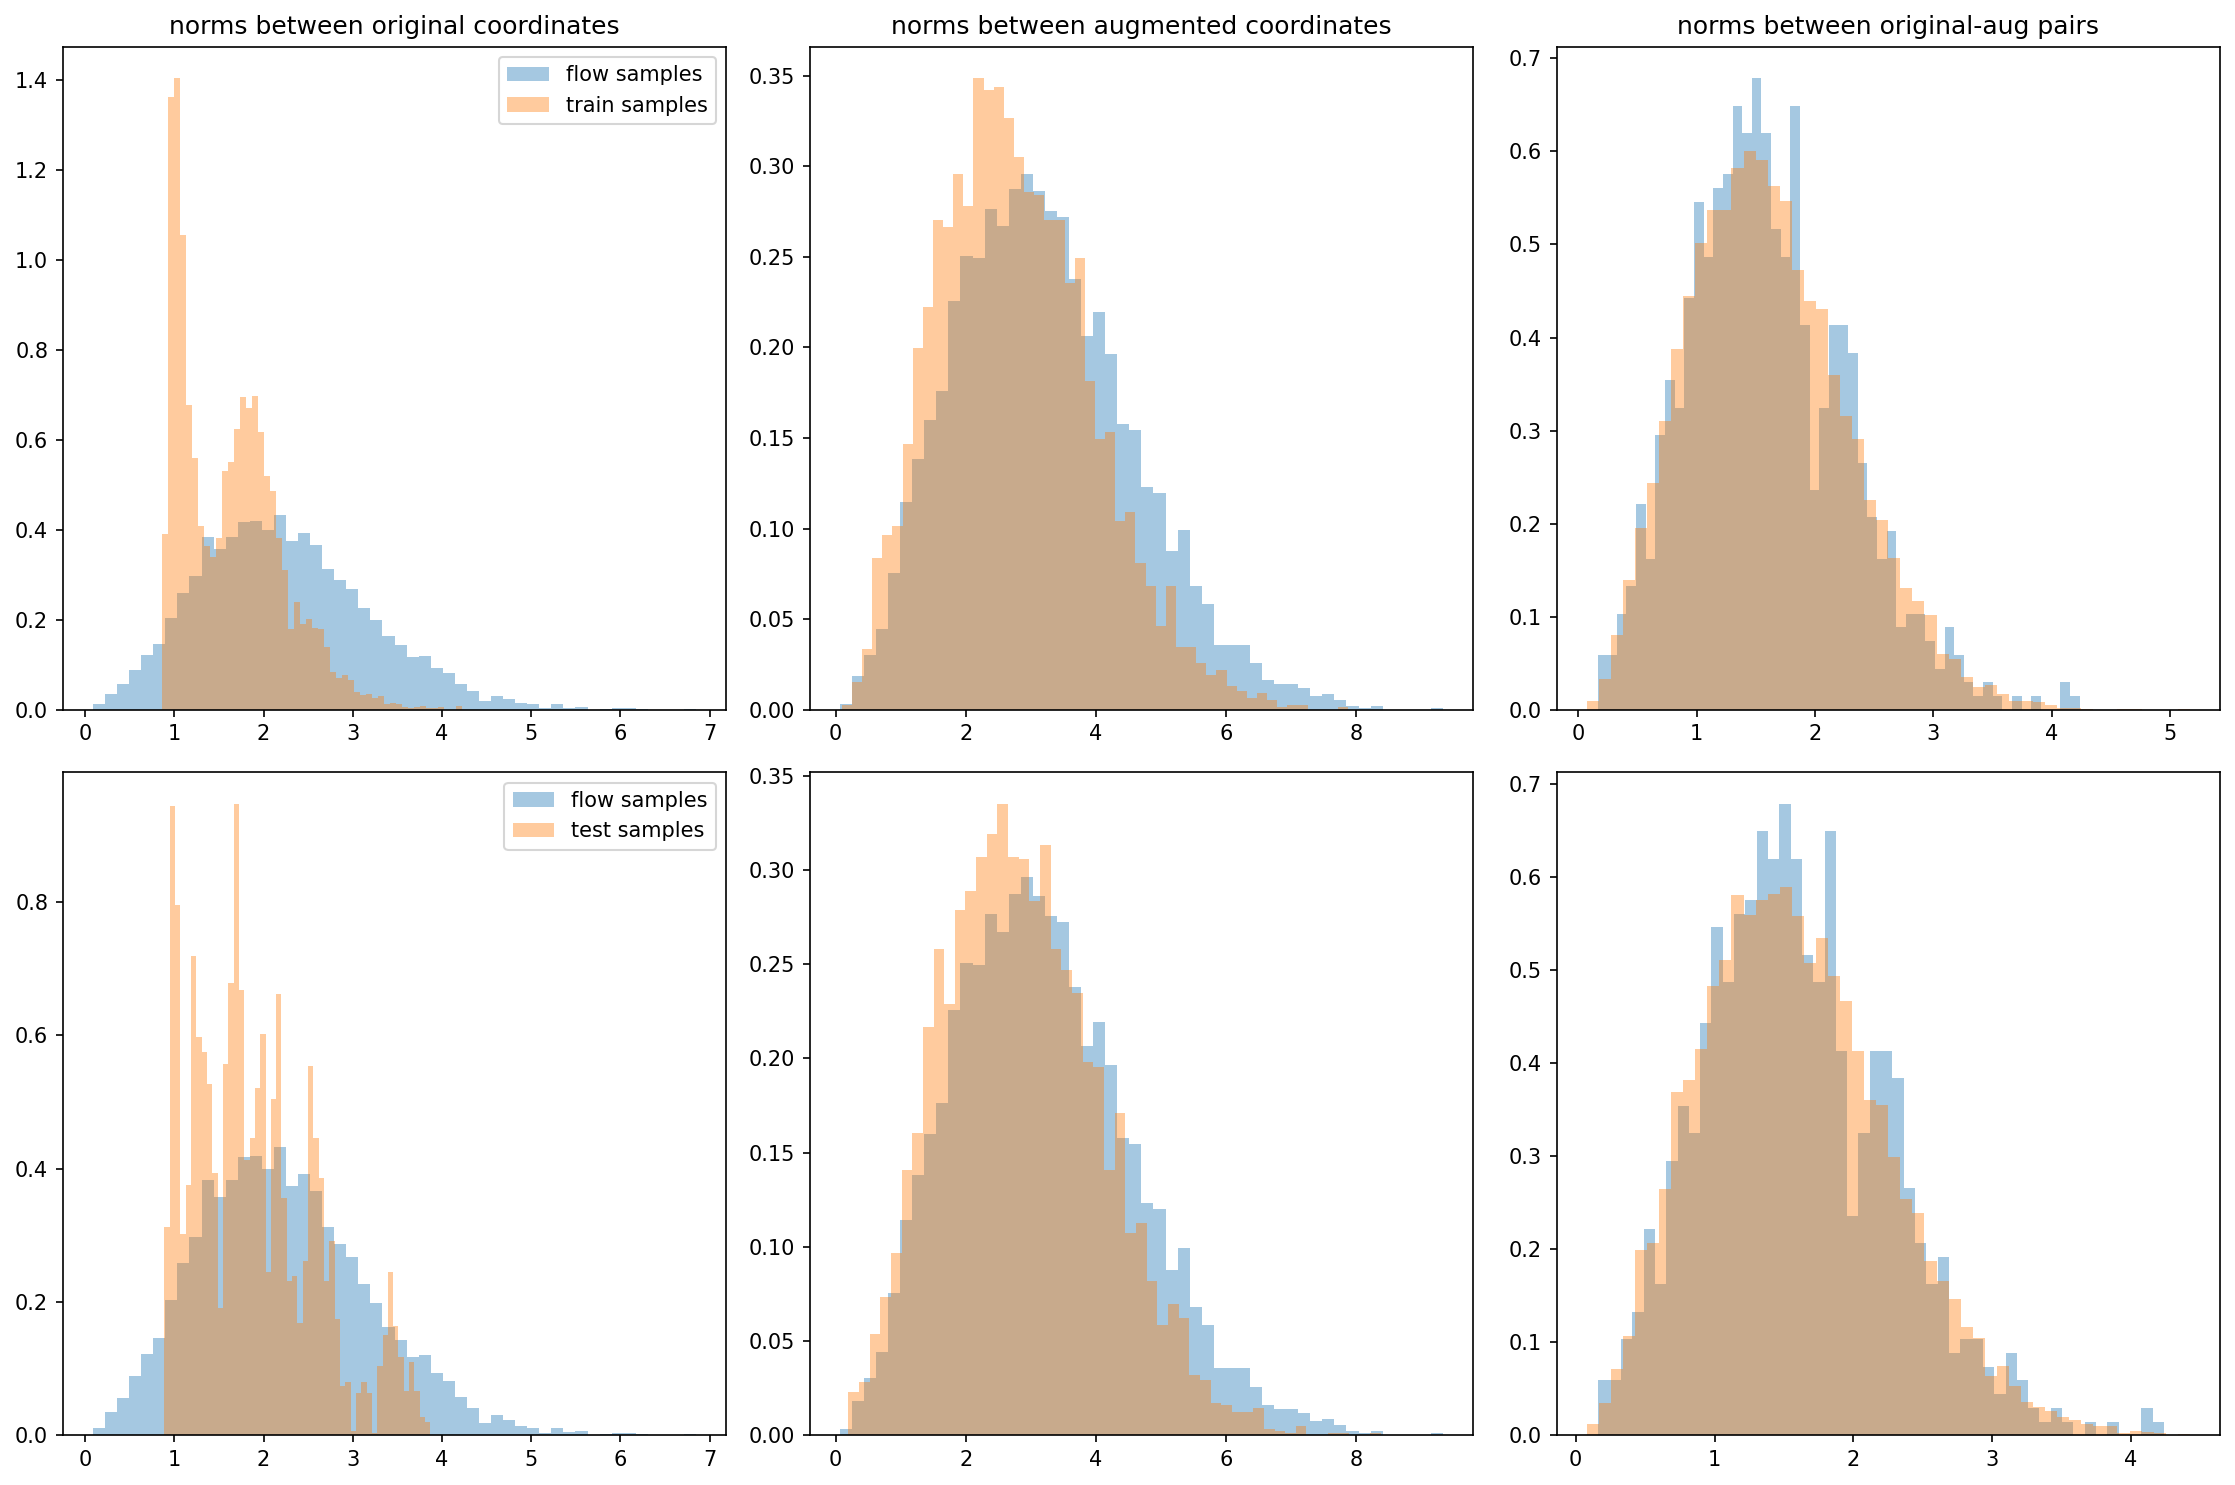

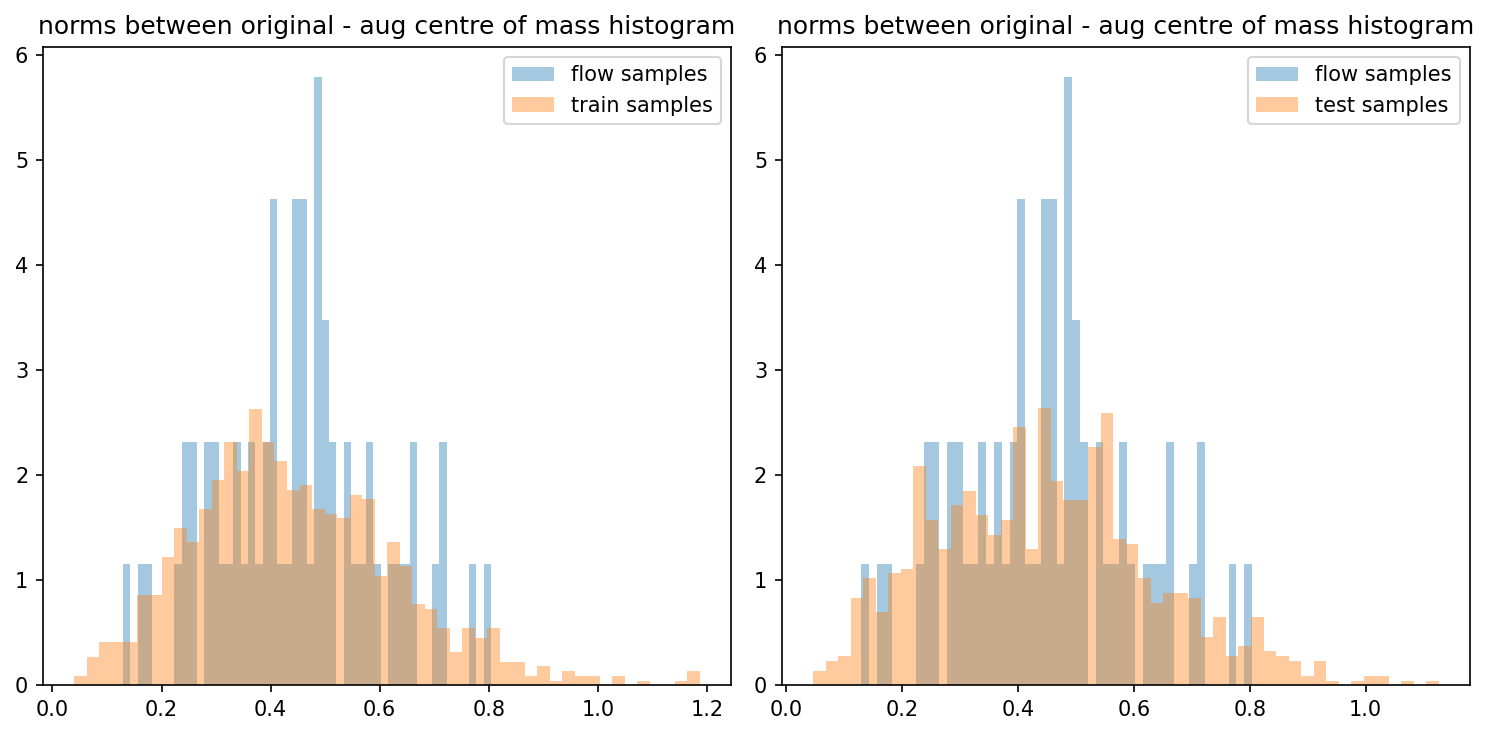

  0%|                                                   | 0/200 [00:00<?, ?it/s]

non numeric history values being saved


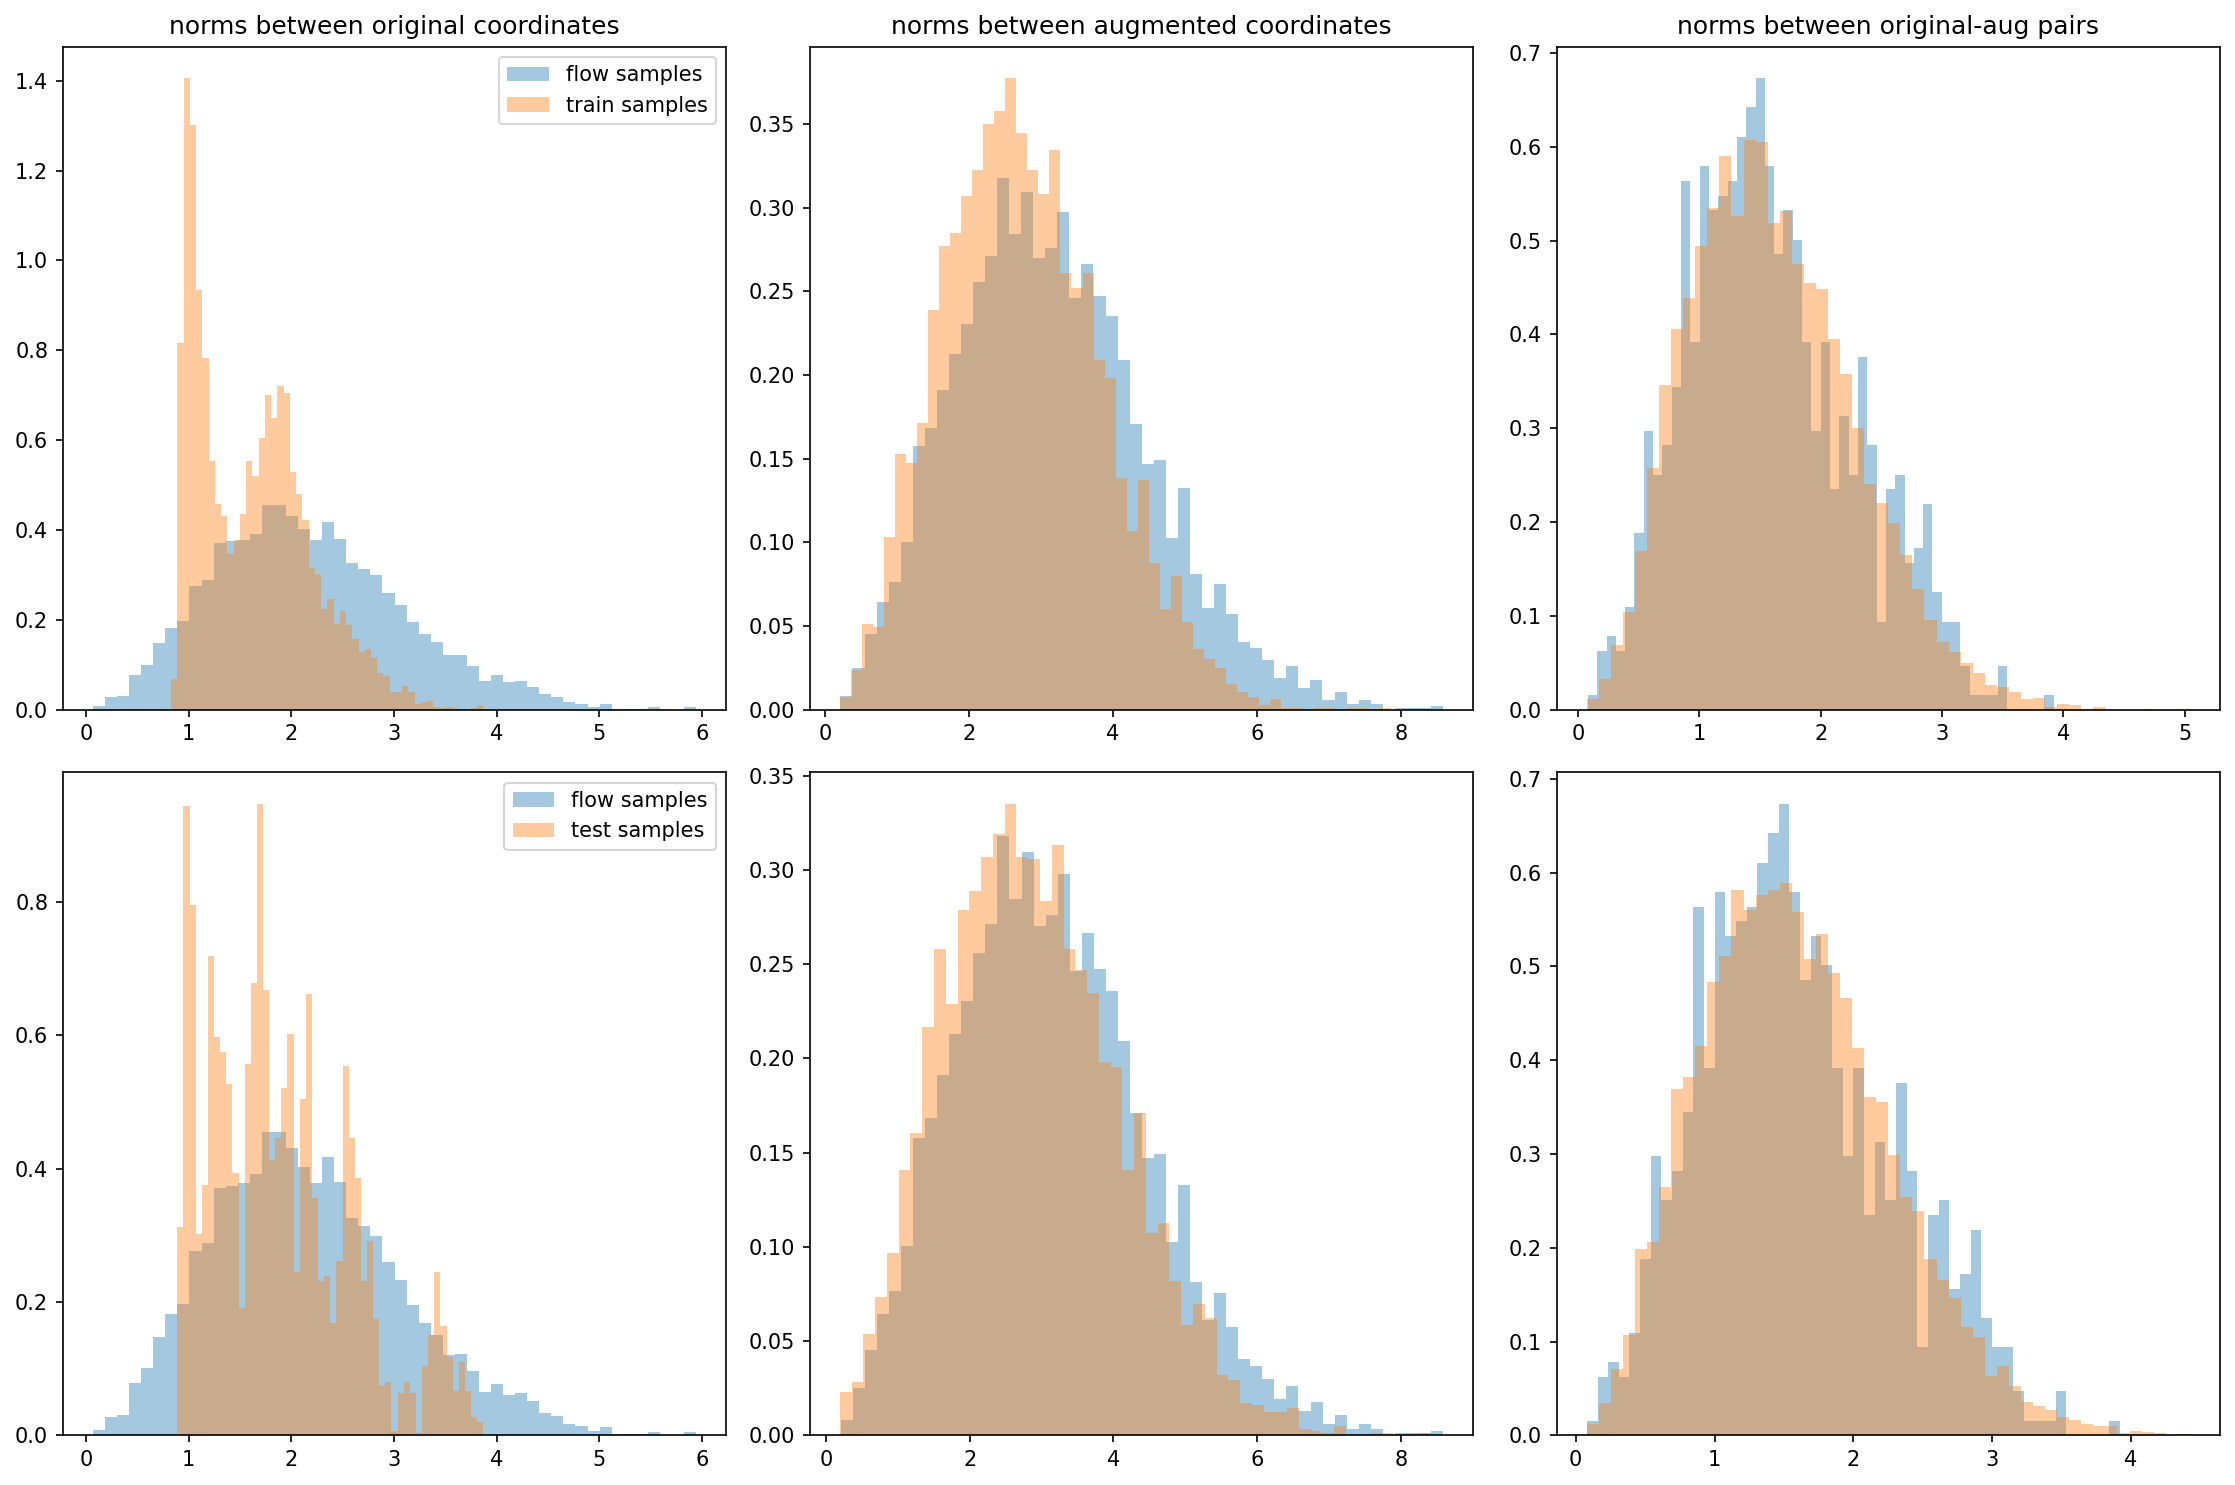

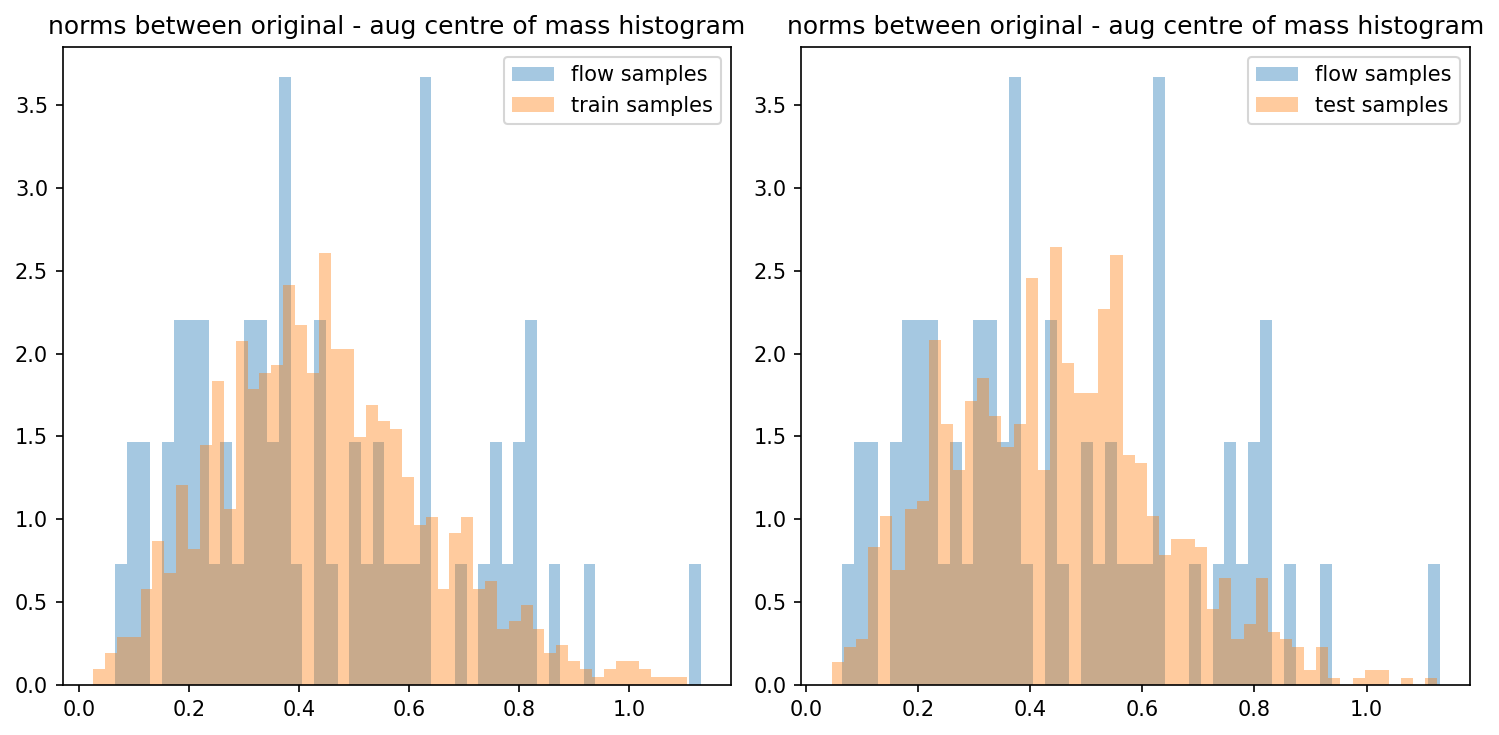

  0%|▏                                        | 1/200 [01:06<3:41:15, 66.71s/it]

{'eval_log_lik': Array(-98.3823, dtype=float32), 'eval_marginal_log_lik': Array(-36.470165, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00020701, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(3.4864745e-05, dtype=float32), 'mean_aug_orig_norm': Array(0.41894647, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5286255, dtype=float32)}


 12%|████▊                                     | 23/200 [01:32<03:51,  1.31s/it]

{'eval_log_lik': Array(-94.879326, dtype=float32), 'eval_marginal_log_lik': Array(-33.07391, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00055288, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00011326, dtype=float32), 'mean_aug_orig_norm': Array(0.30986086, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5398799, dtype=float32)}


 14%|█████▉                                    | 28/200 [01:38<03:18,  1.15s/it]

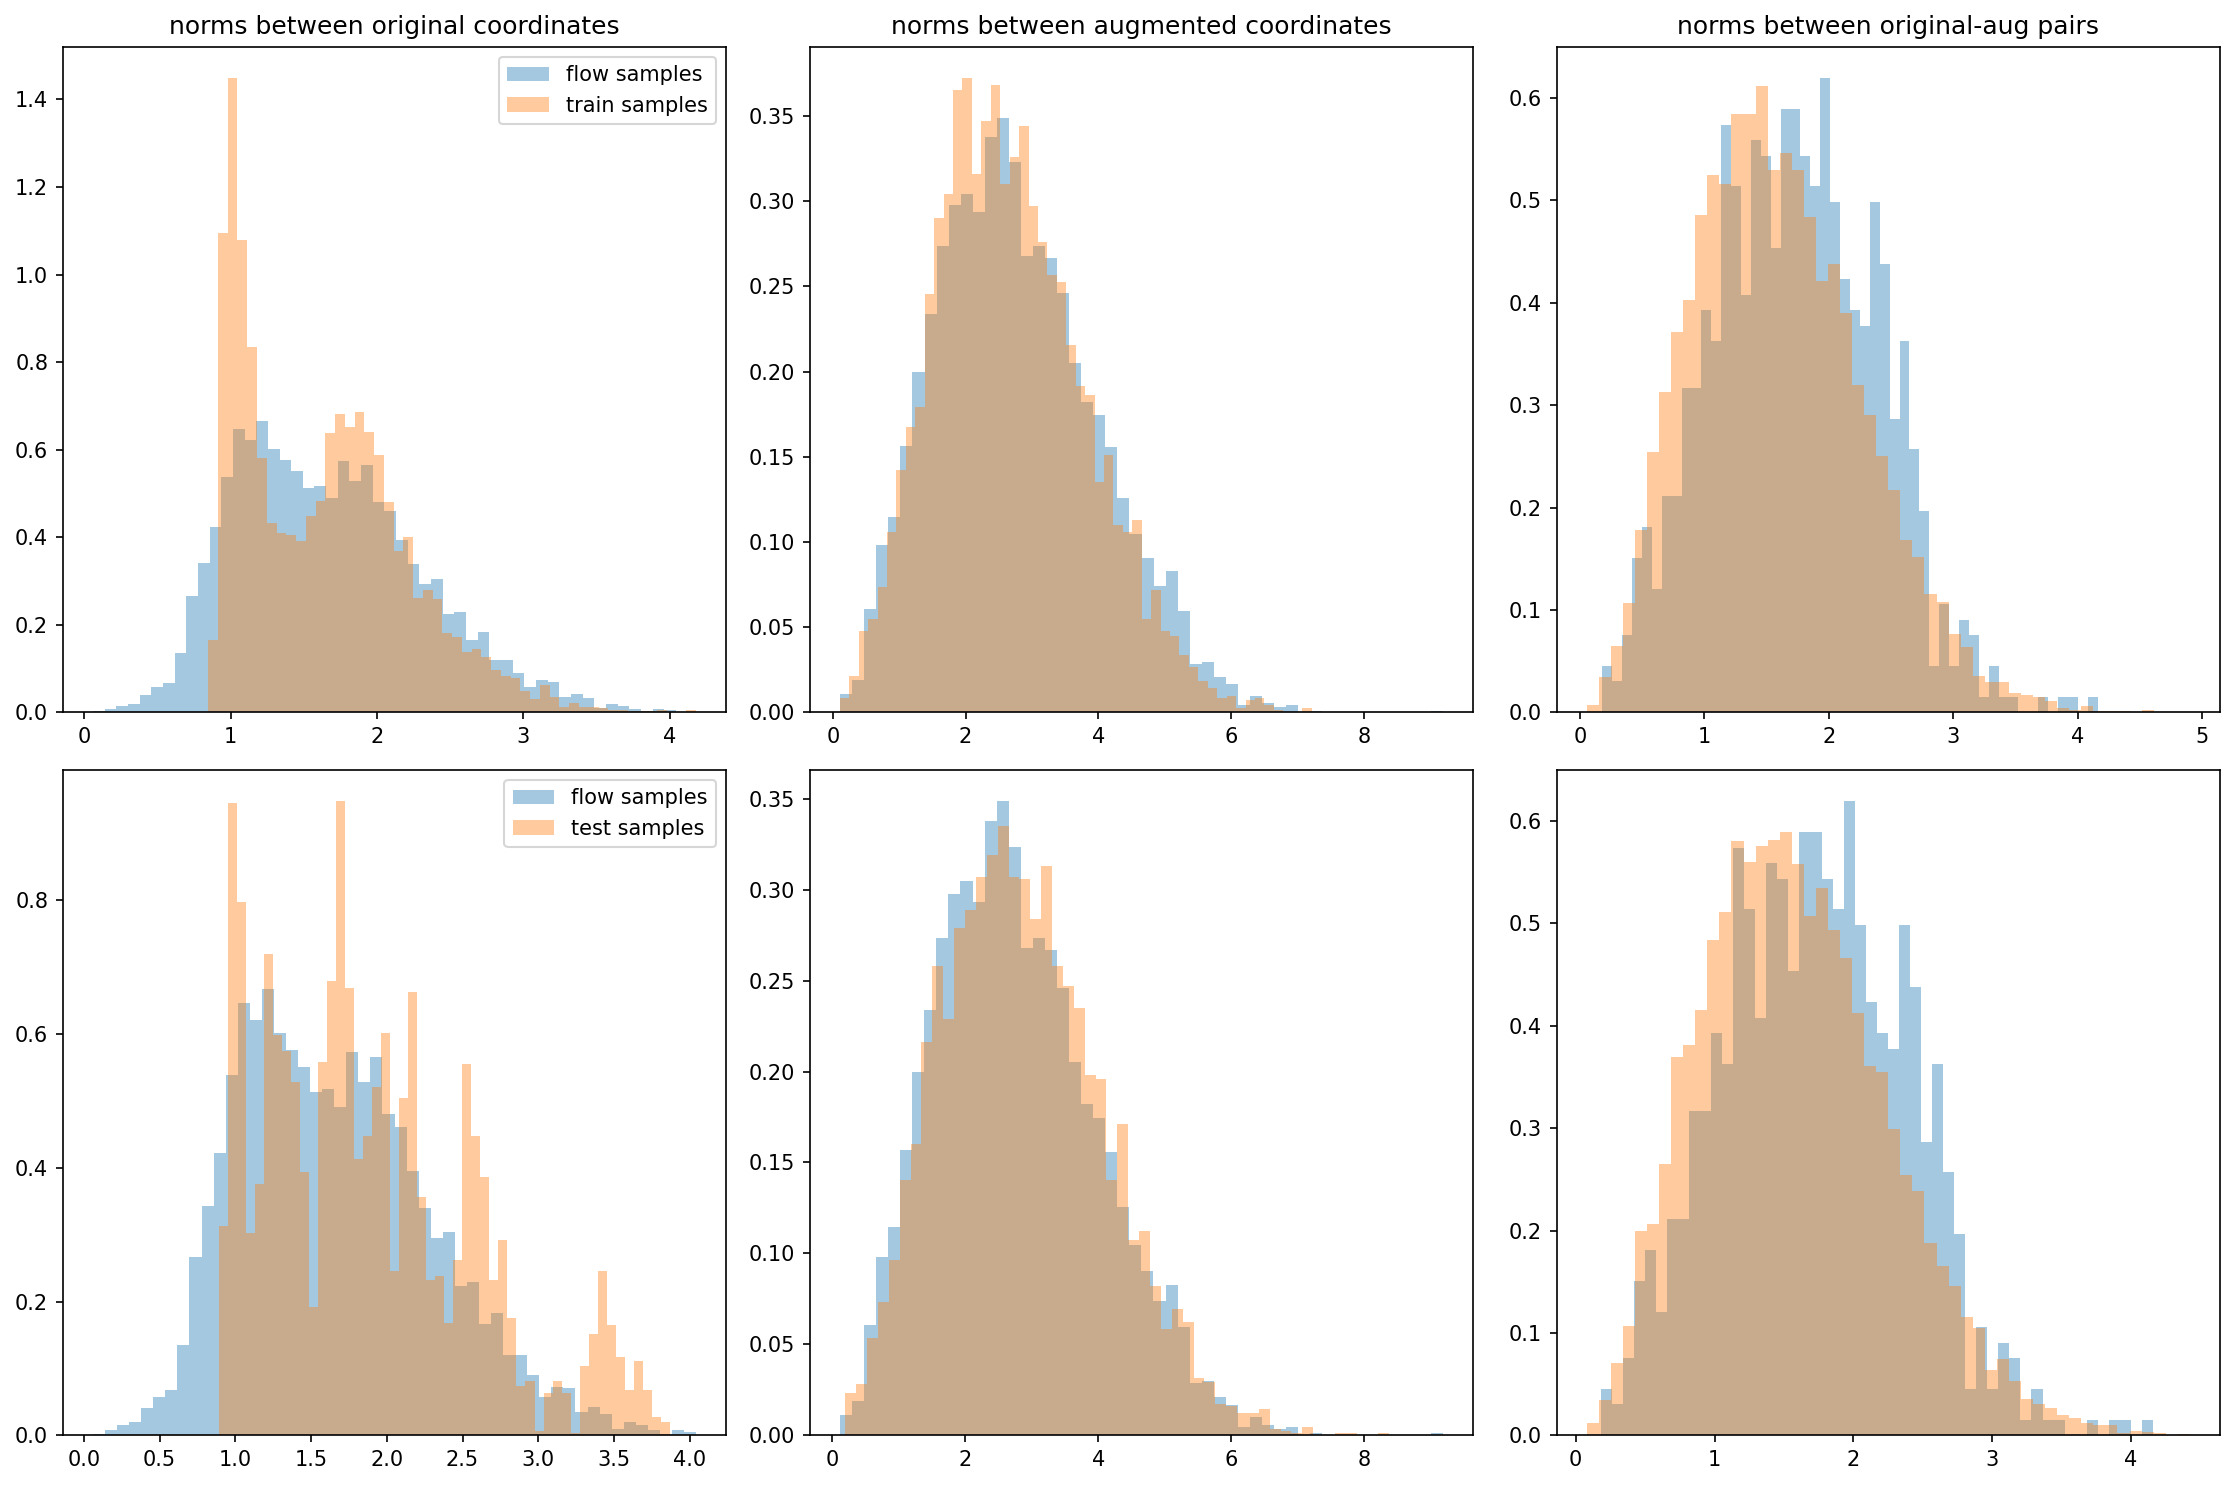

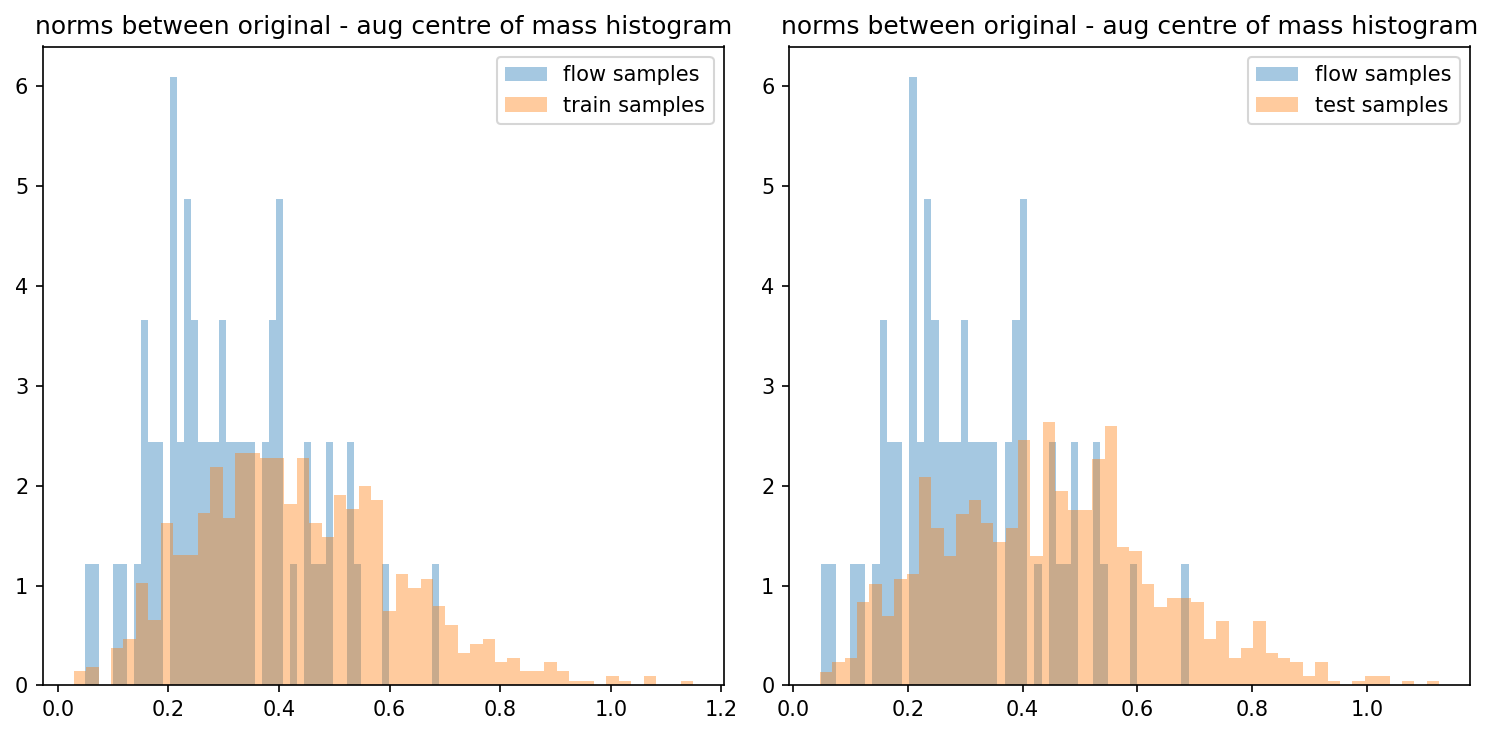

 22%|█████████▍                                | 45/200 [02:03<03:22,  1.31s/it]

{'eval_log_lik': Array(-94.08369, dtype=float32), 'eval_marginal_log_lik': Array(-32.18406, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00193532, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00019479, dtype=float32), 'mean_aug_orig_norm': Array(0.3497563, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5348446, dtype=float32)}


 28%|███████████▊                              | 56/200 [02:16<02:42,  1.13s/it]

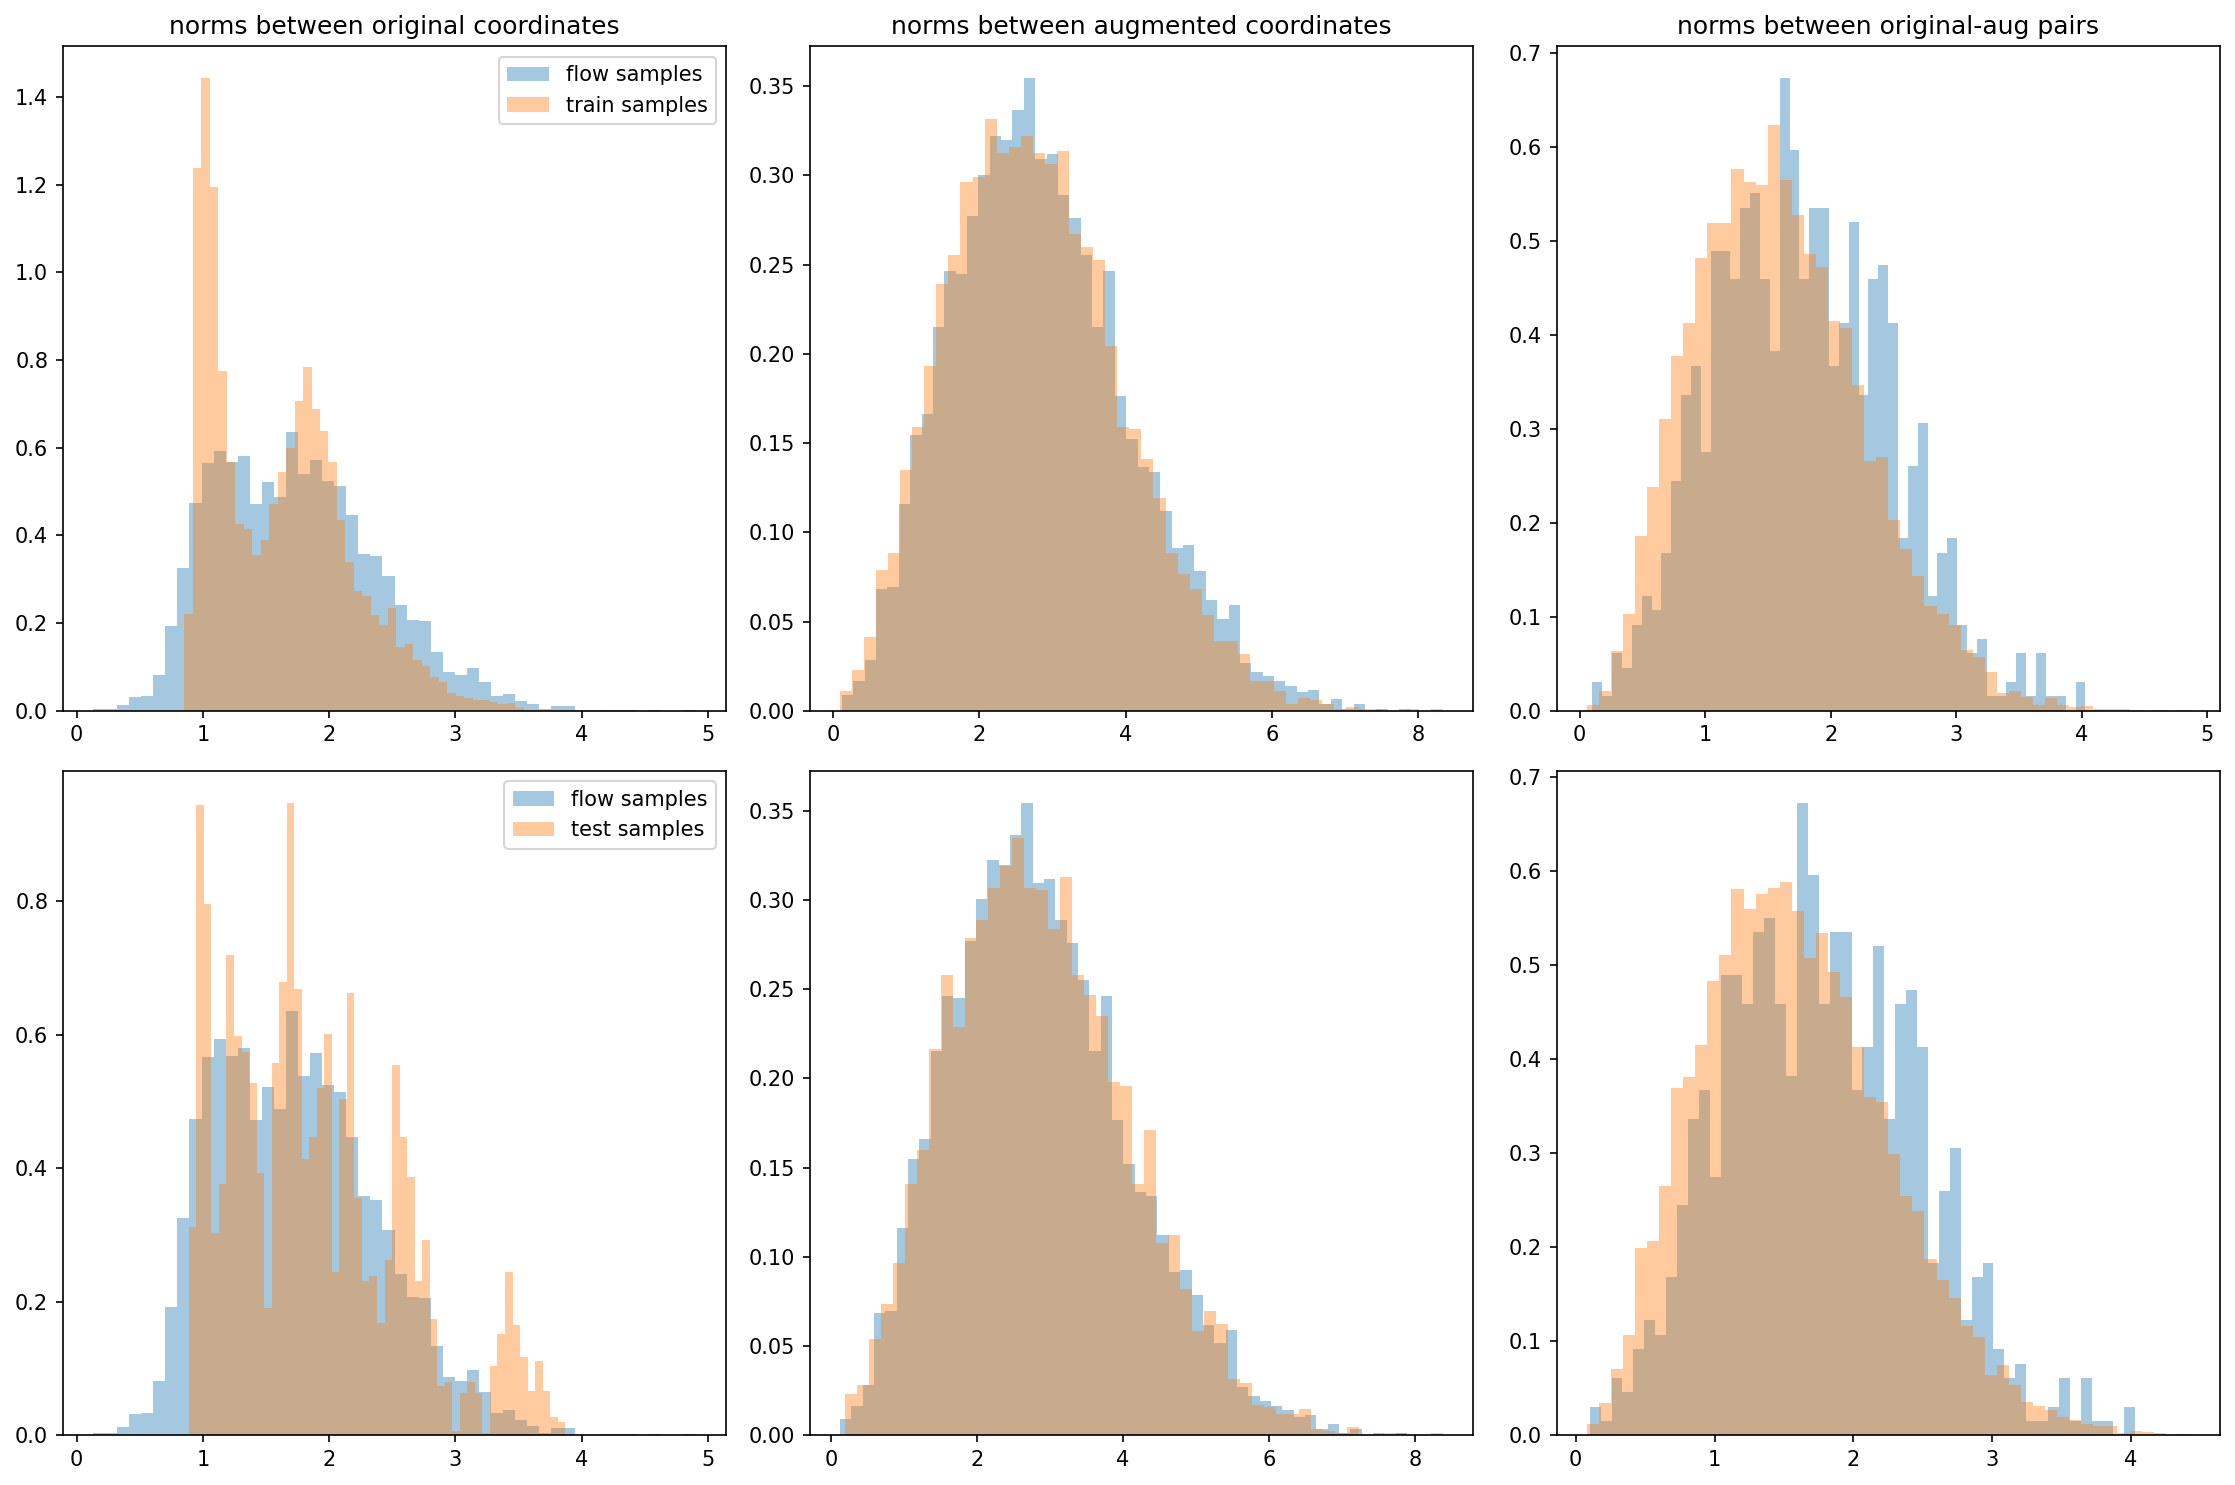

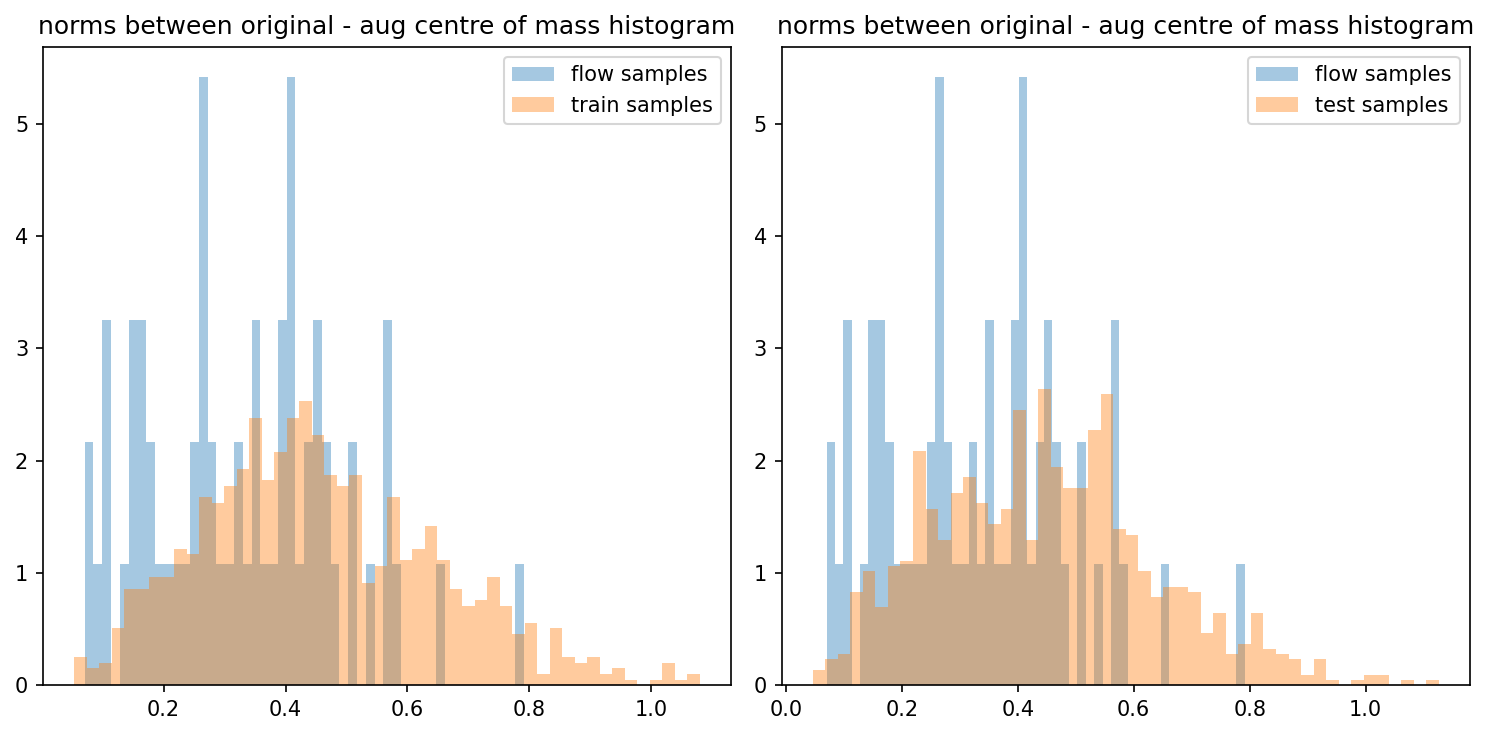

 34%|██████████████                            | 67/200 [02:35<03:00,  1.36s/it]

{'eval_log_lik': Array(-93.857506, dtype=float32), 'eval_marginal_log_lik': Array(-32.158188, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00252635, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00021039, dtype=float32), 'mean_aug_orig_norm': Array(0.31846756, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5497597, dtype=float32)}


 42%|█████████████████▊                        | 85/200 [02:55<02:10,  1.14s/it]

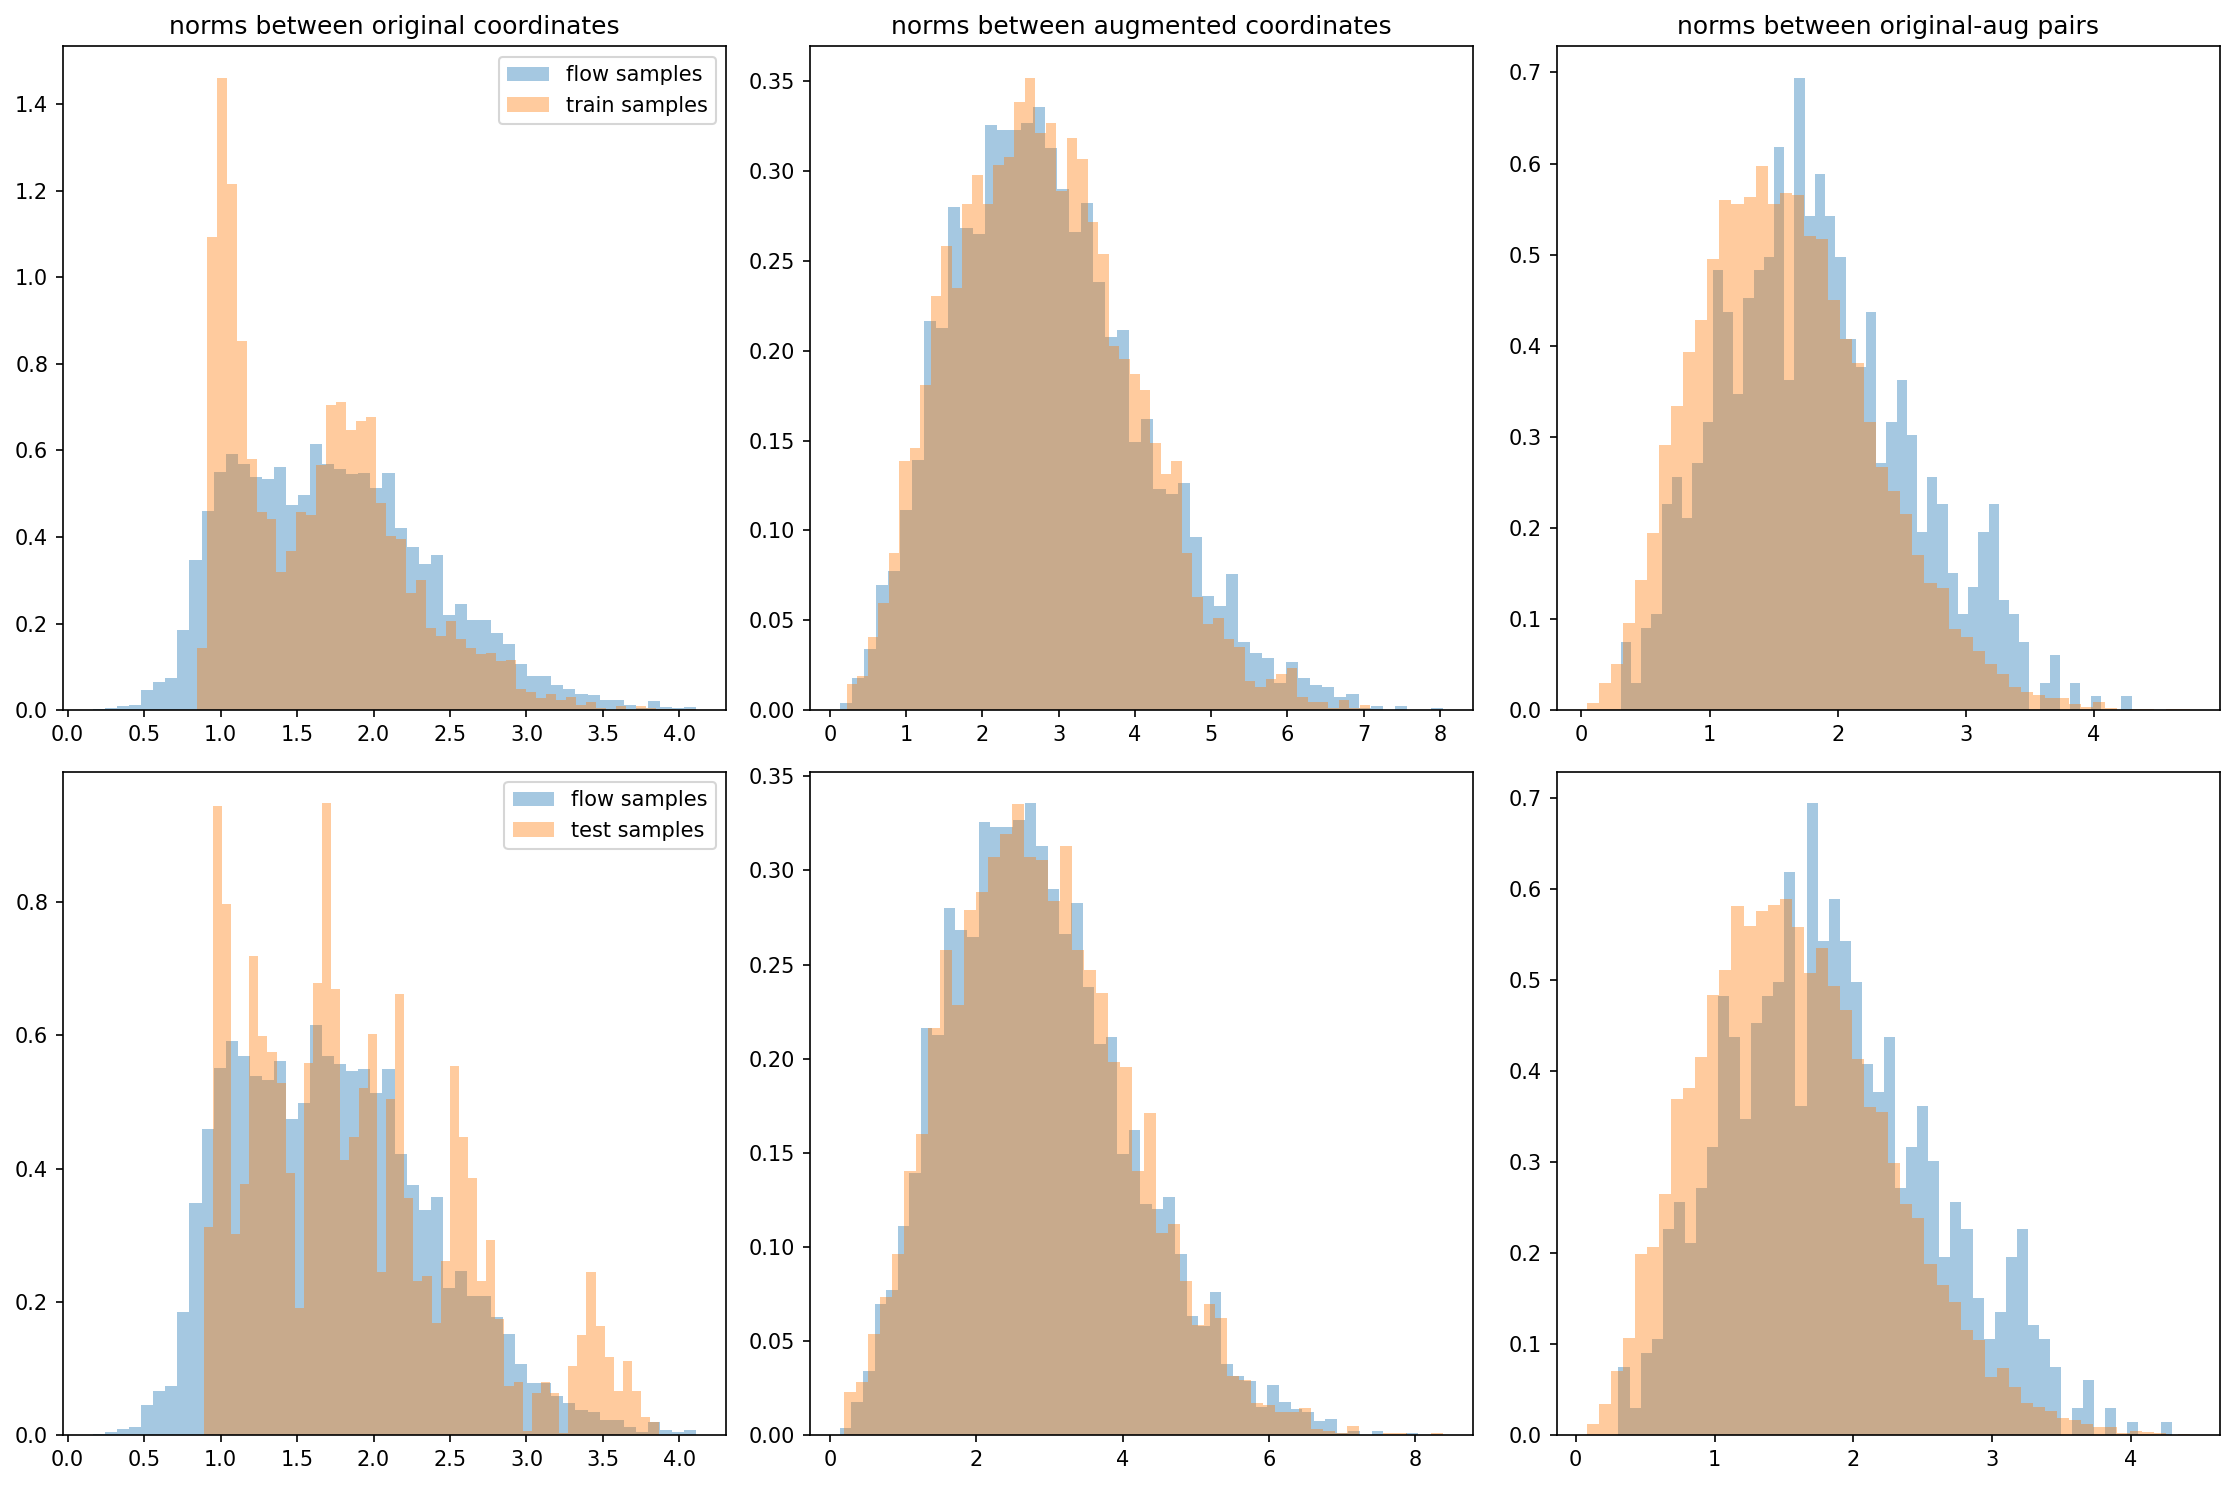

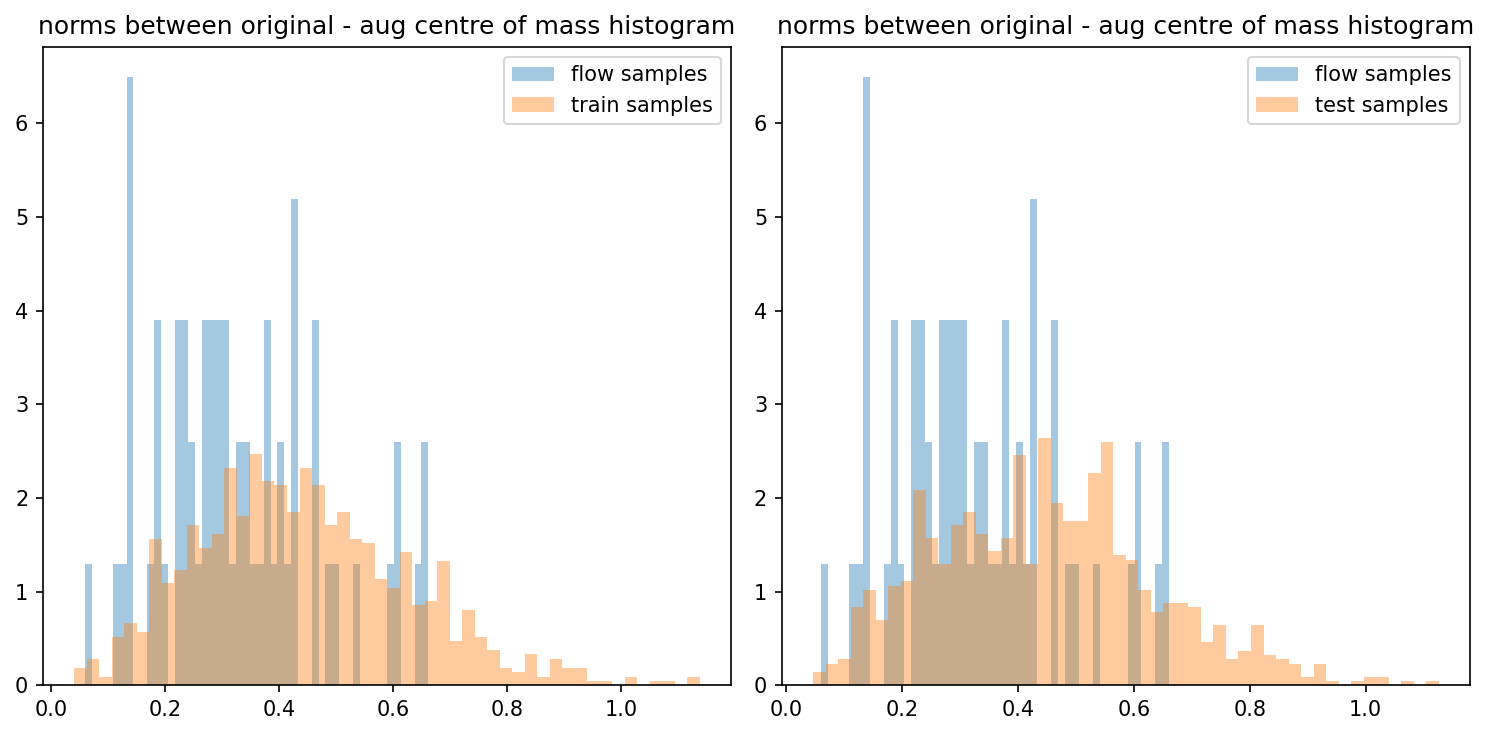

 44%|██████████████████▋                       | 89/200 [03:07<03:35,  1.94s/it]

{'eval_log_lik': Array(-93.649284, dtype=float32), 'eval_marginal_log_lik': Array(-32.02624, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00208333, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00023718, dtype=float32), 'mean_aug_orig_norm': Array(0.32069895, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5202798, dtype=float32)}


 56%|██████████████████████▊                  | 111/200 [03:32<02:00,  1.35s/it]

{'eval_log_lik': Array(-93.666405, dtype=float32), 'eval_marginal_log_lik': Array(-31.994856, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00203705, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.0002415, dtype=float32), 'mean_aug_orig_norm': Array(0.31988734, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5301856, dtype=float32)}


 56%|███████████████████████▏                 | 113/200 [03:35<01:49,  1.26s/it]

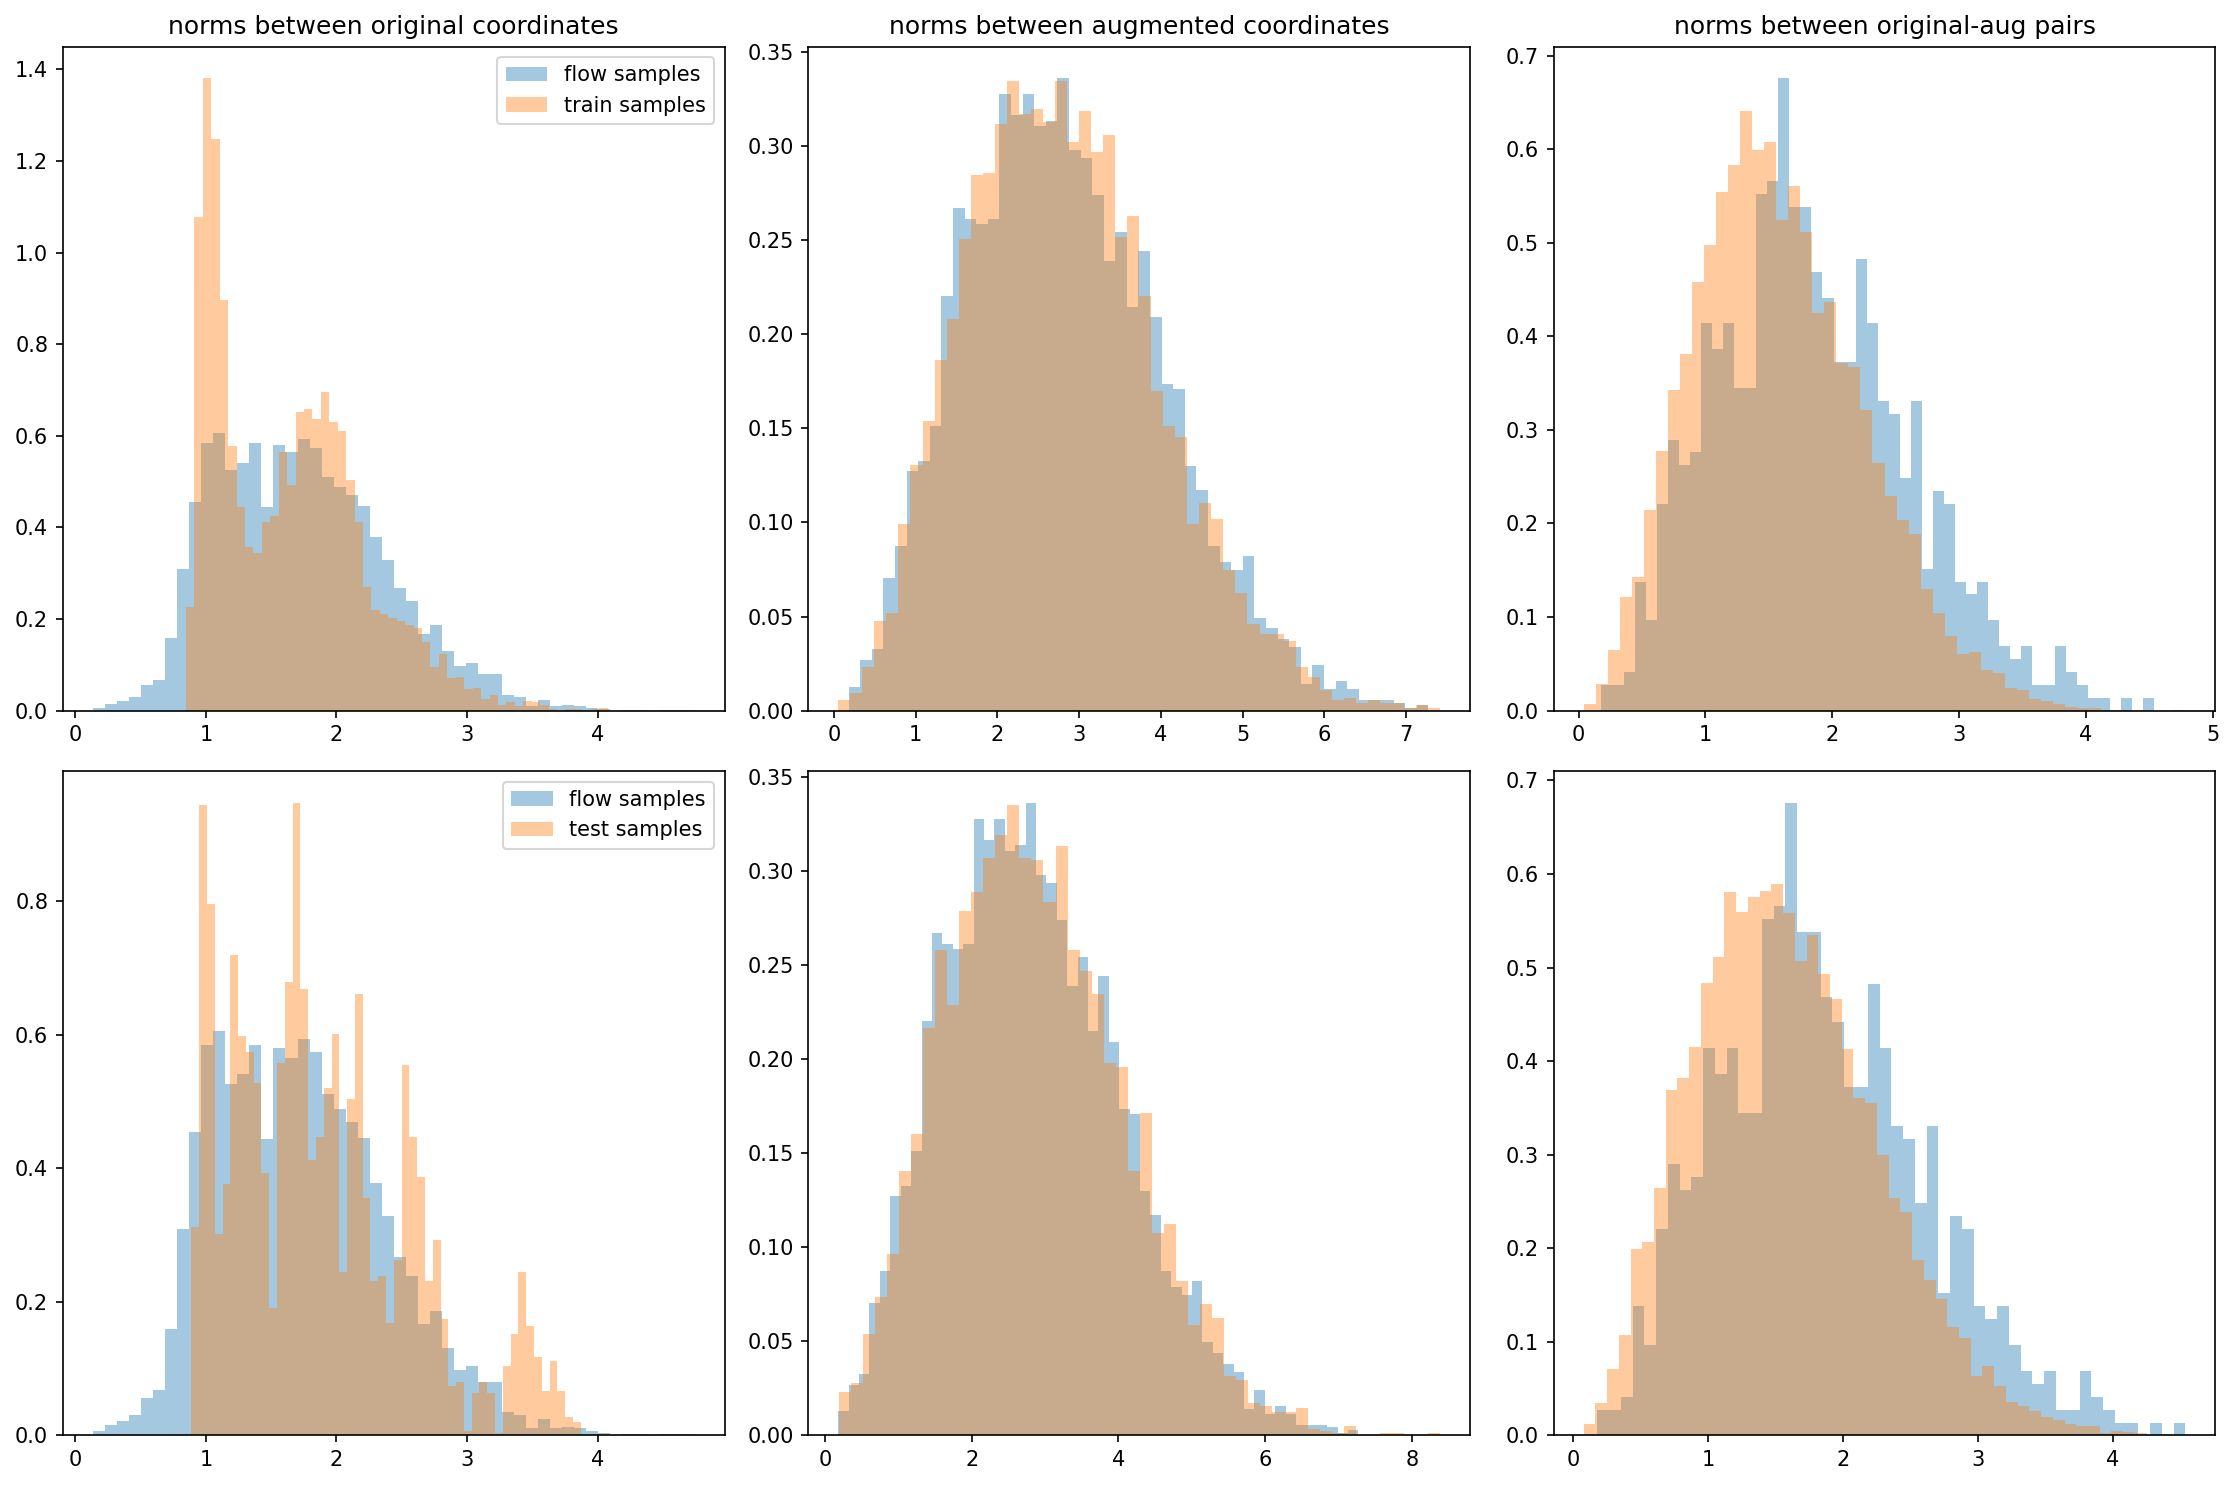

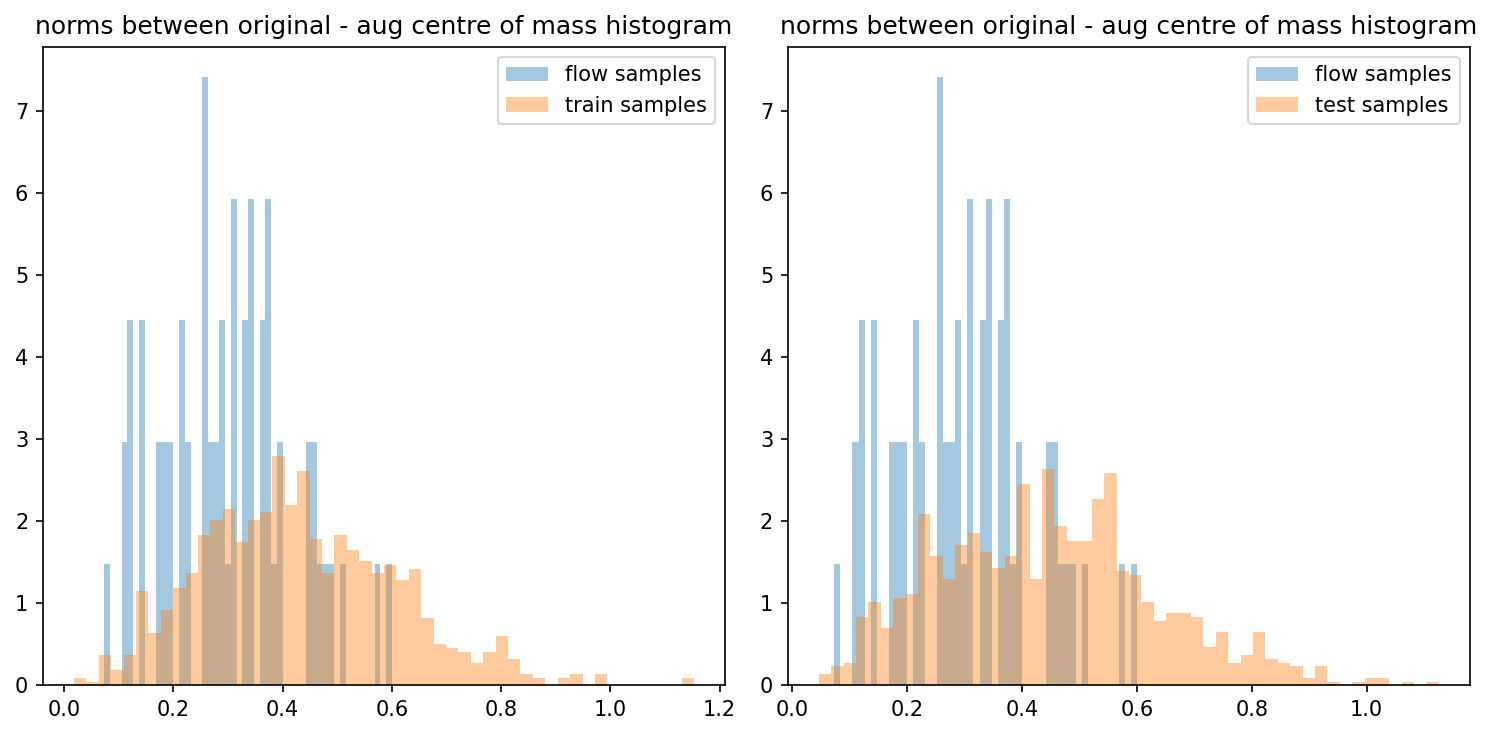

 66%|███████████████████████████▎             | 133/200 [04:05<01:30,  1.35s/it]

{'eval_log_lik': Array(-93.63131, dtype=float32), 'eval_marginal_log_lik': Array(-31.718077, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00221252, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00025946, dtype=float32), 'mean_aug_orig_norm': Array(0.31575948, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5478348, dtype=float32)}


 71%|█████████████████████████████            | 142/200 [04:15<01:08,  1.18s/it]

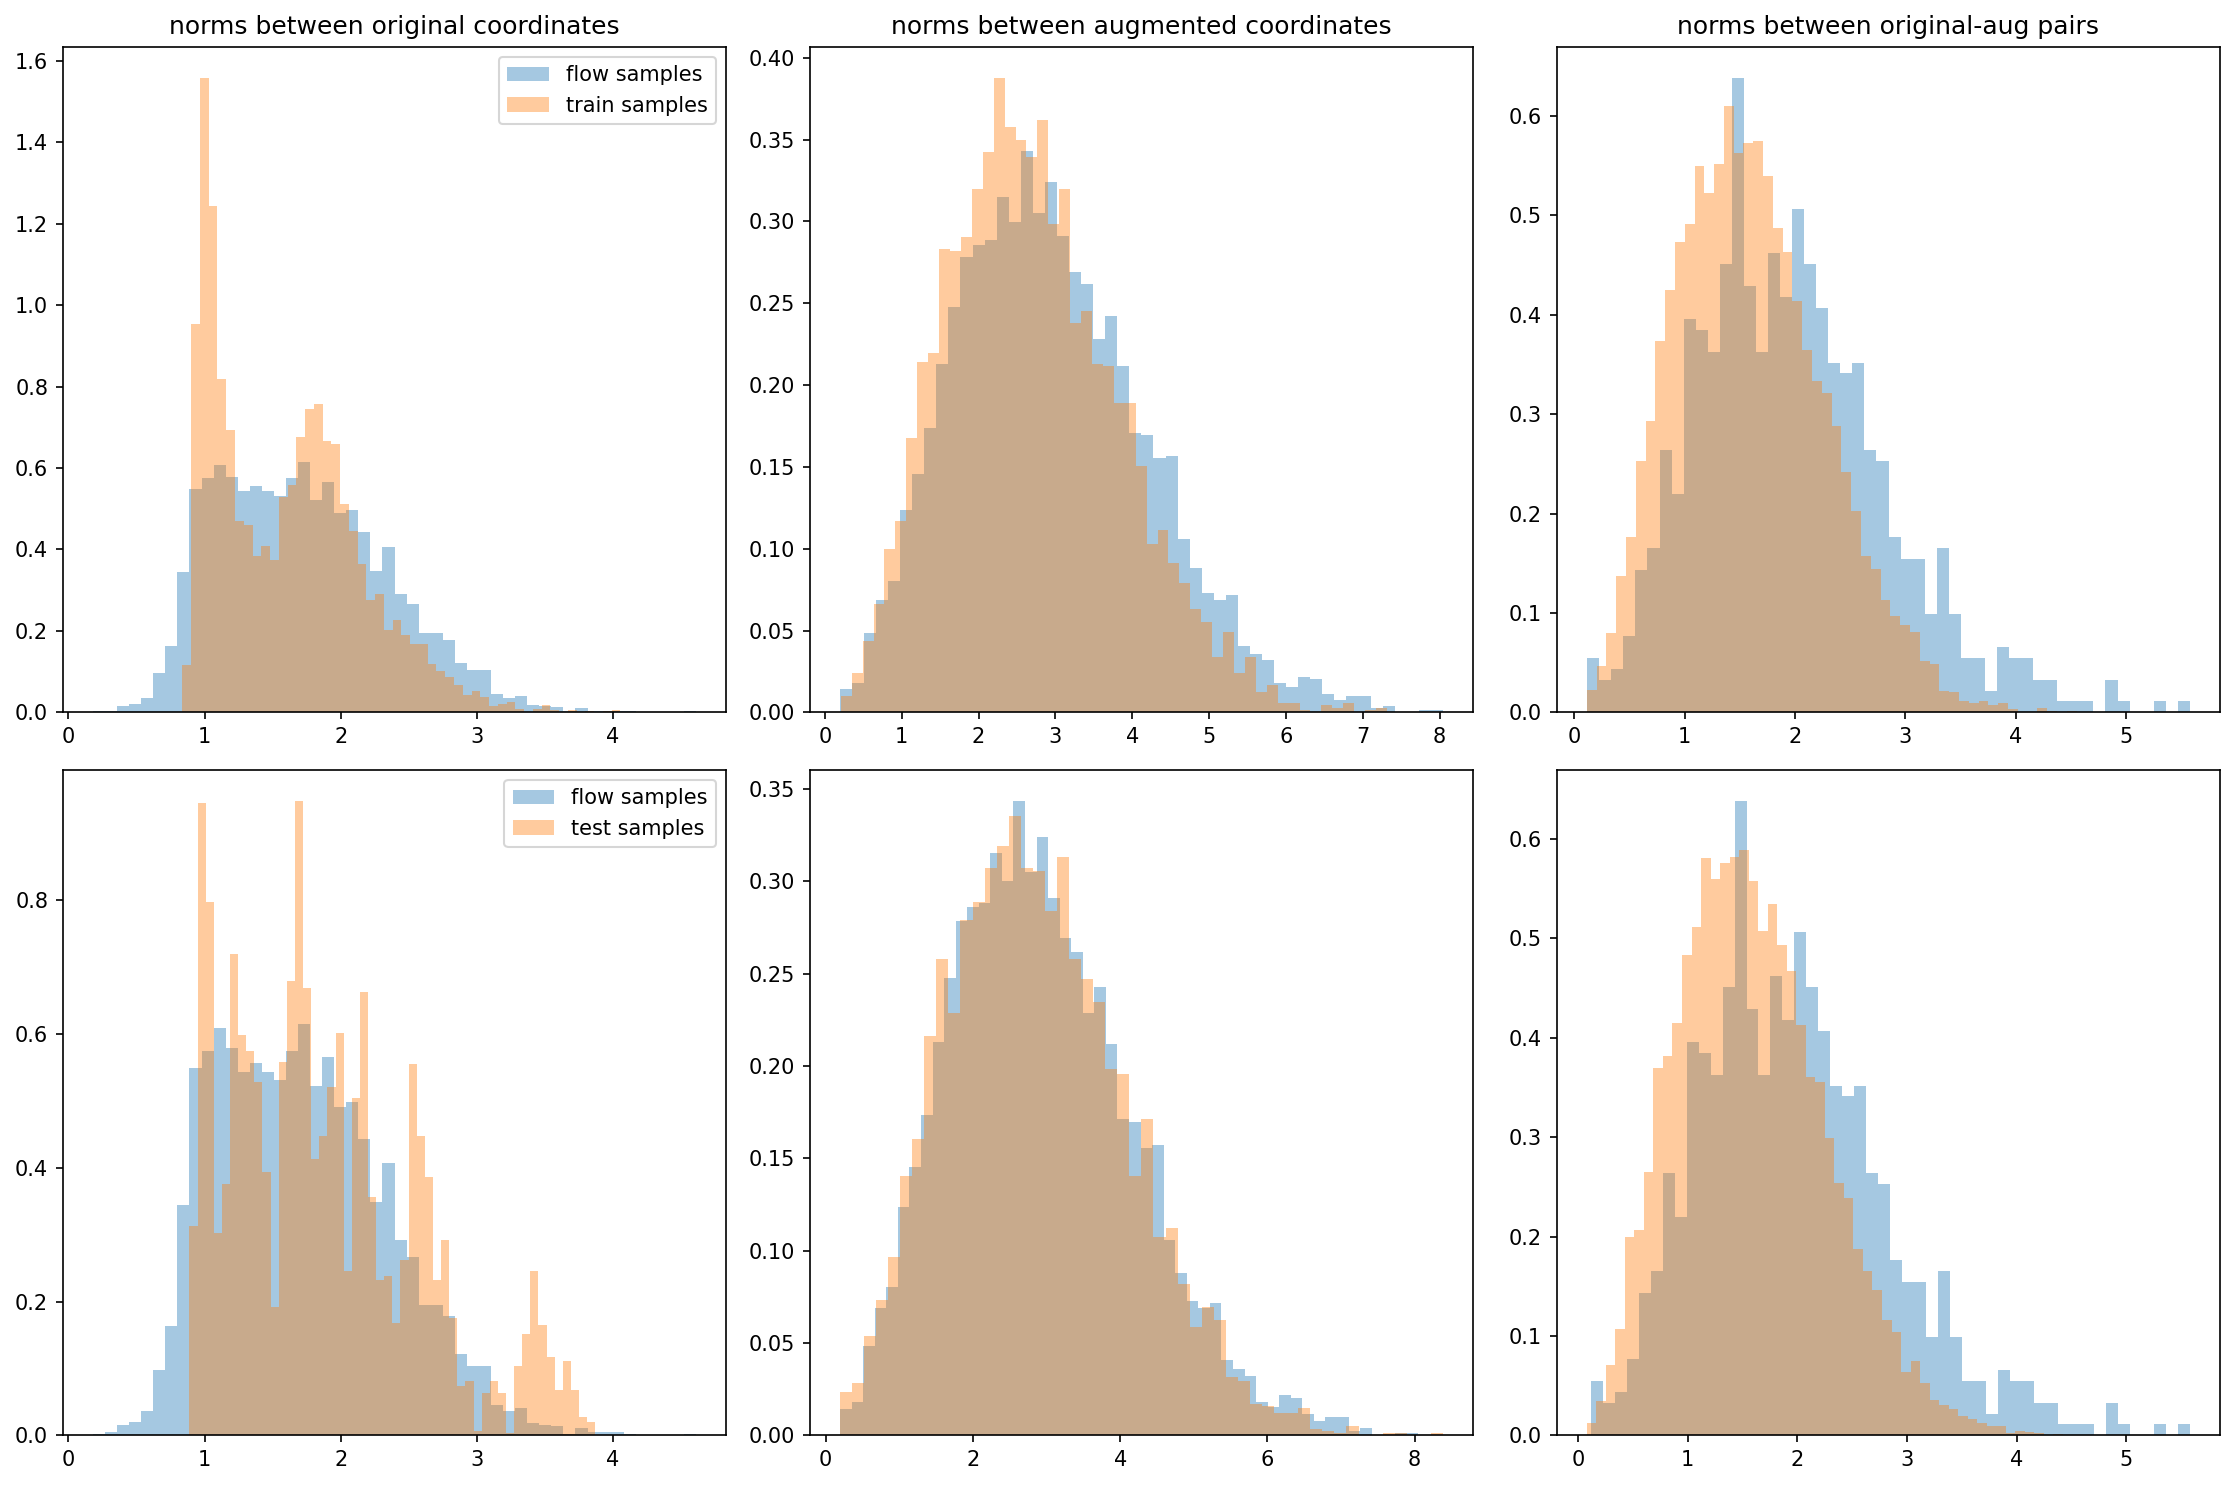

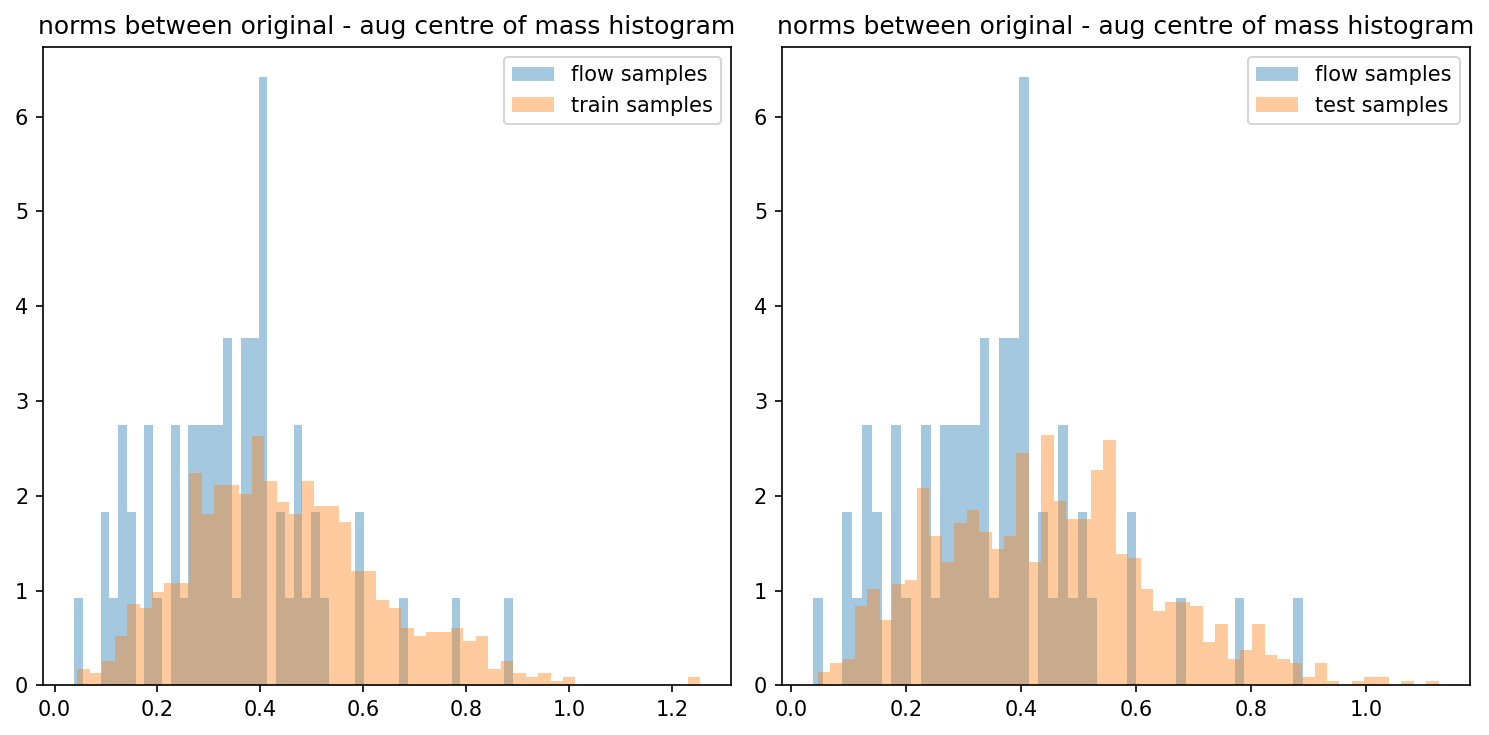

 78%|███████████████████████████████▊         | 155/200 [04:37<01:01,  1.36s/it]

{'eval_log_lik': Array(-93.30514, dtype=float32), 'eval_marginal_log_lik': Array(-31.473158, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00161743, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00027993, dtype=float32), 'mean_aug_orig_norm': Array(0.39146894, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5383878, dtype=float32)}


 85%|██████████████████████████████████▊      | 170/200 [04:55<00:35,  1.18s/it]

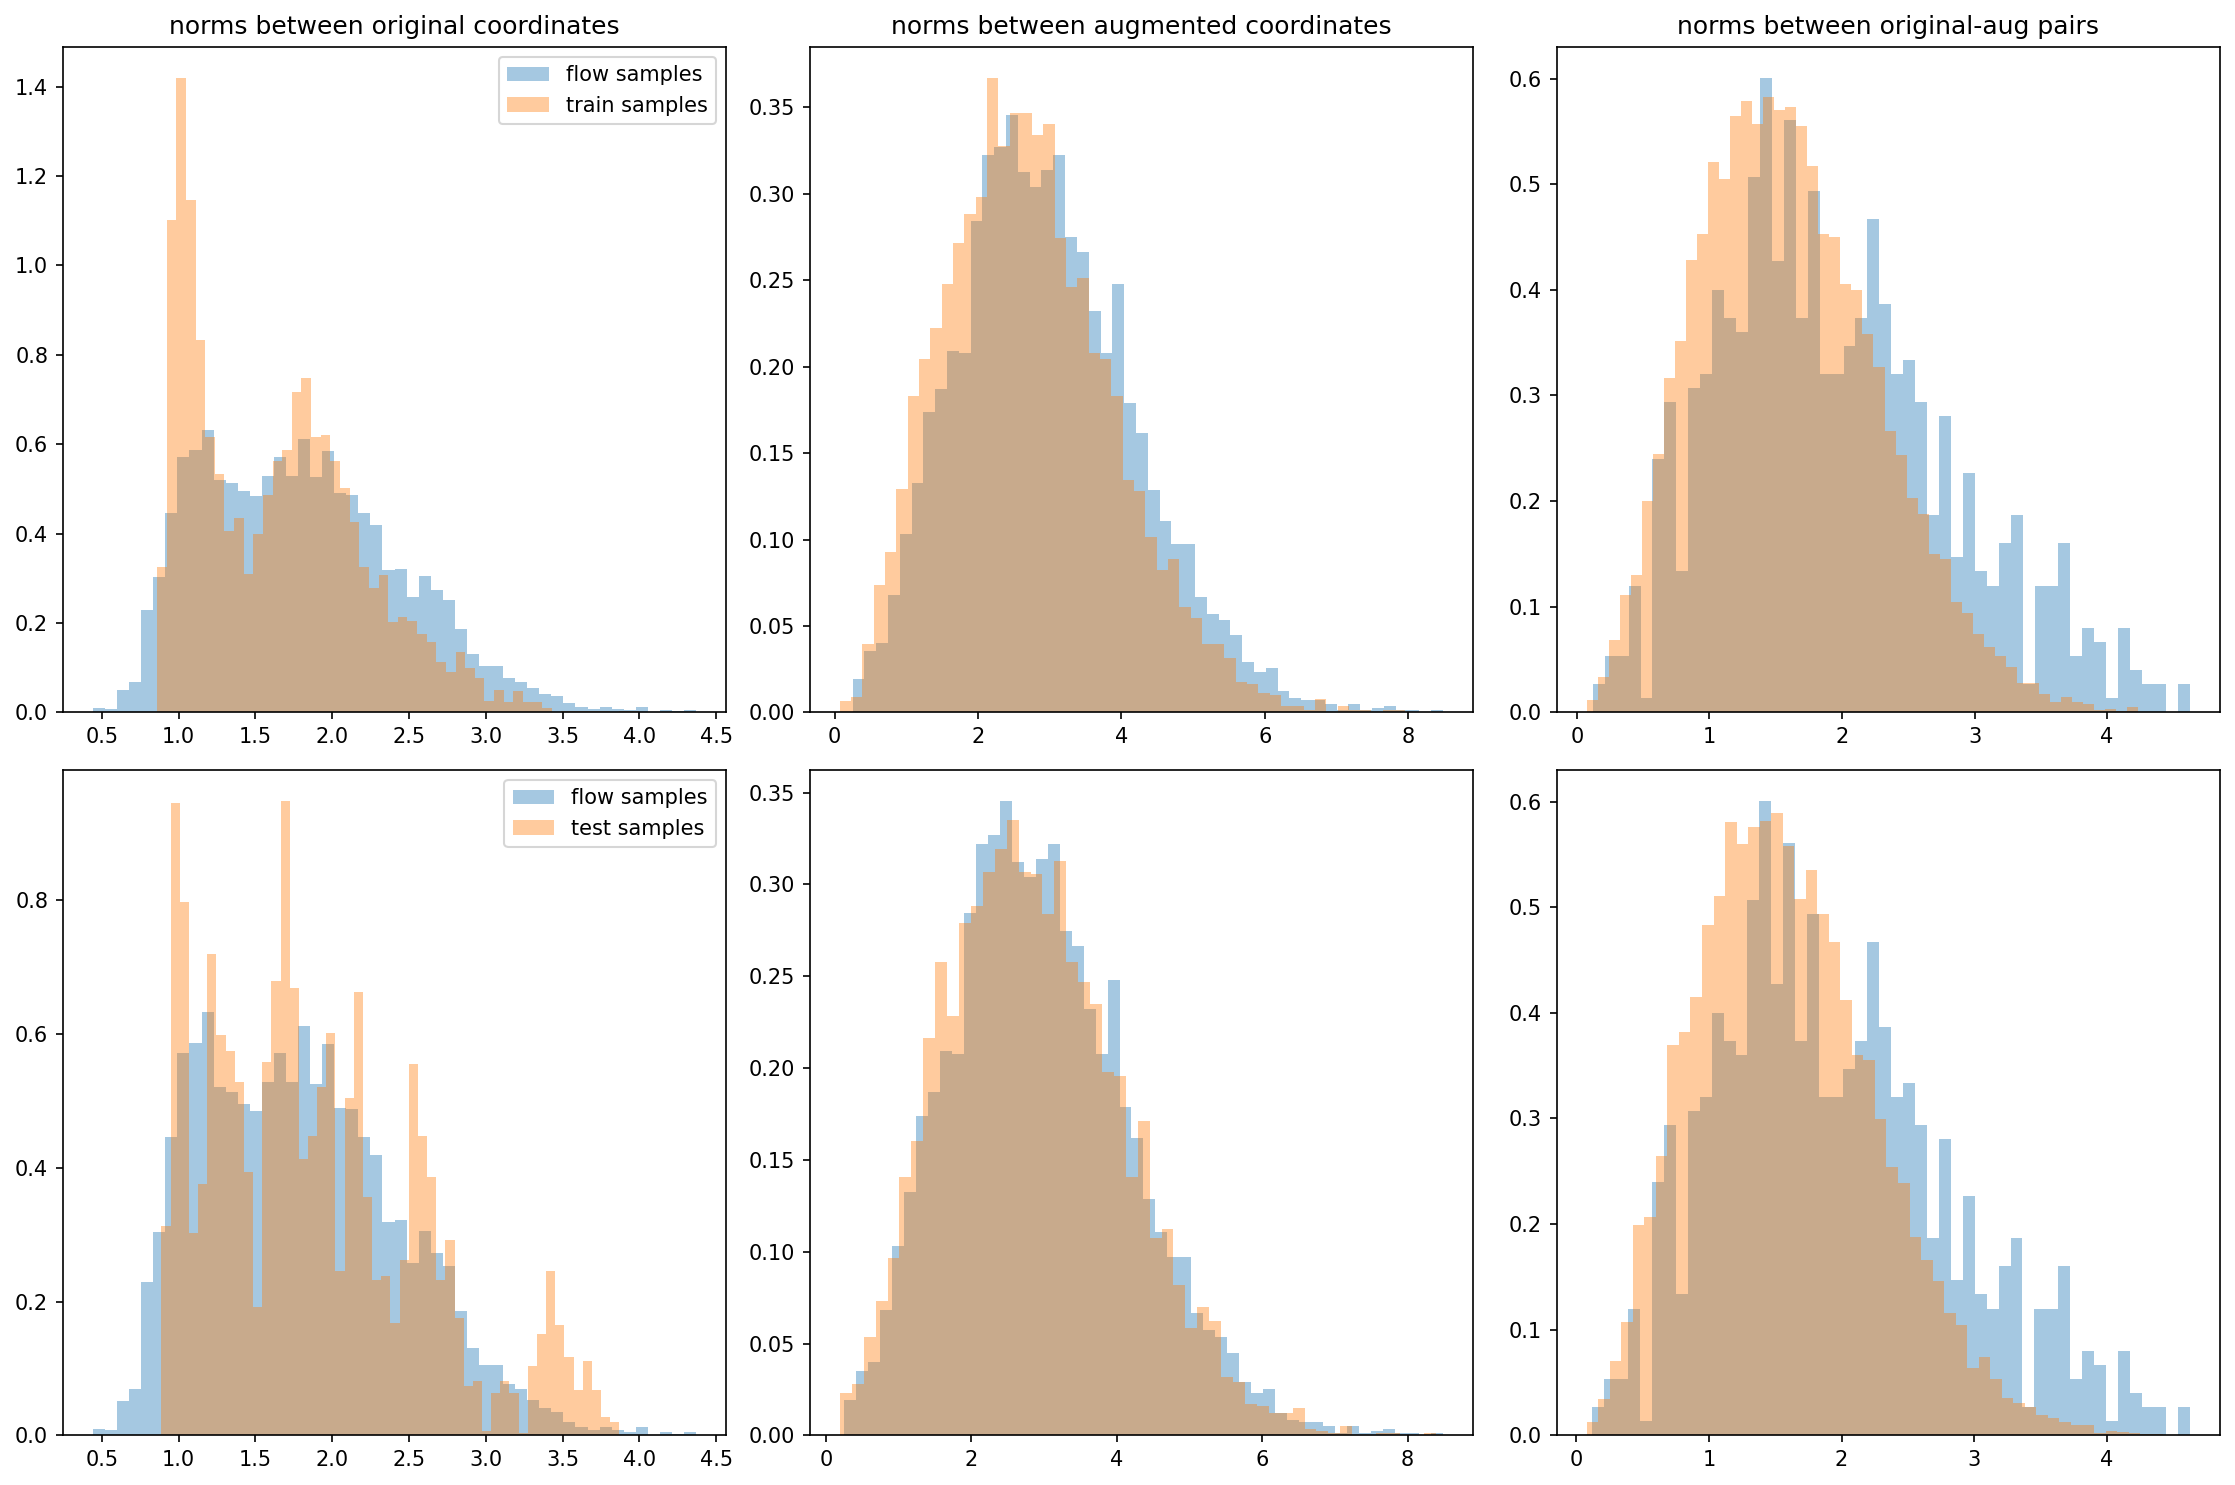

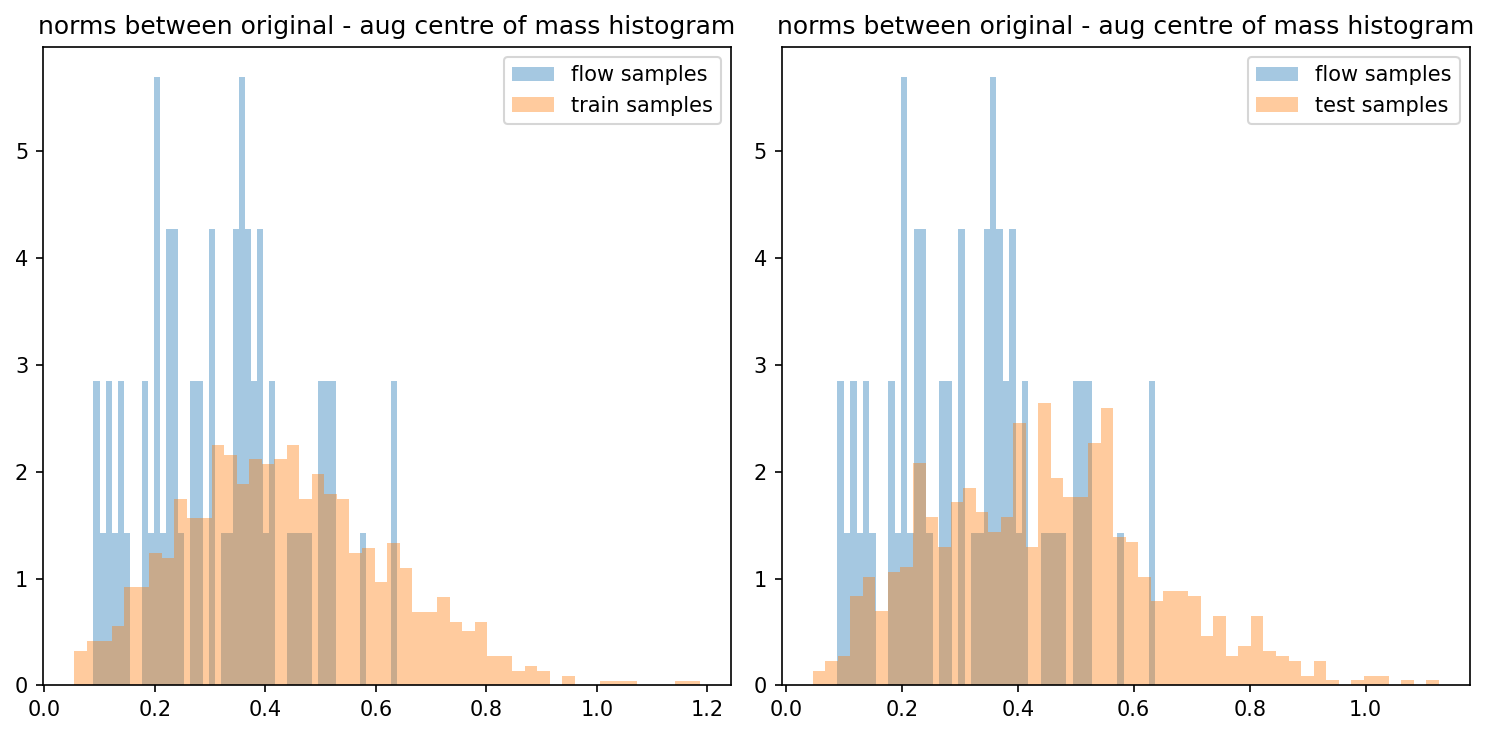

 88%|████████████████████████████████████▎    | 177/200 [05:09<00:35,  1.53s/it]

{'eval_log_lik': Array(-92.84054, dtype=float32), 'eval_marginal_log_lik': Array(-31.165045, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00315094, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00030177, dtype=float32), 'mean_aug_orig_norm': Array(0.39420384, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5446259, dtype=float32)}


100%|████████████████████████████████████████▊| 199/200 [05:35<00:01,  1.25s/it]

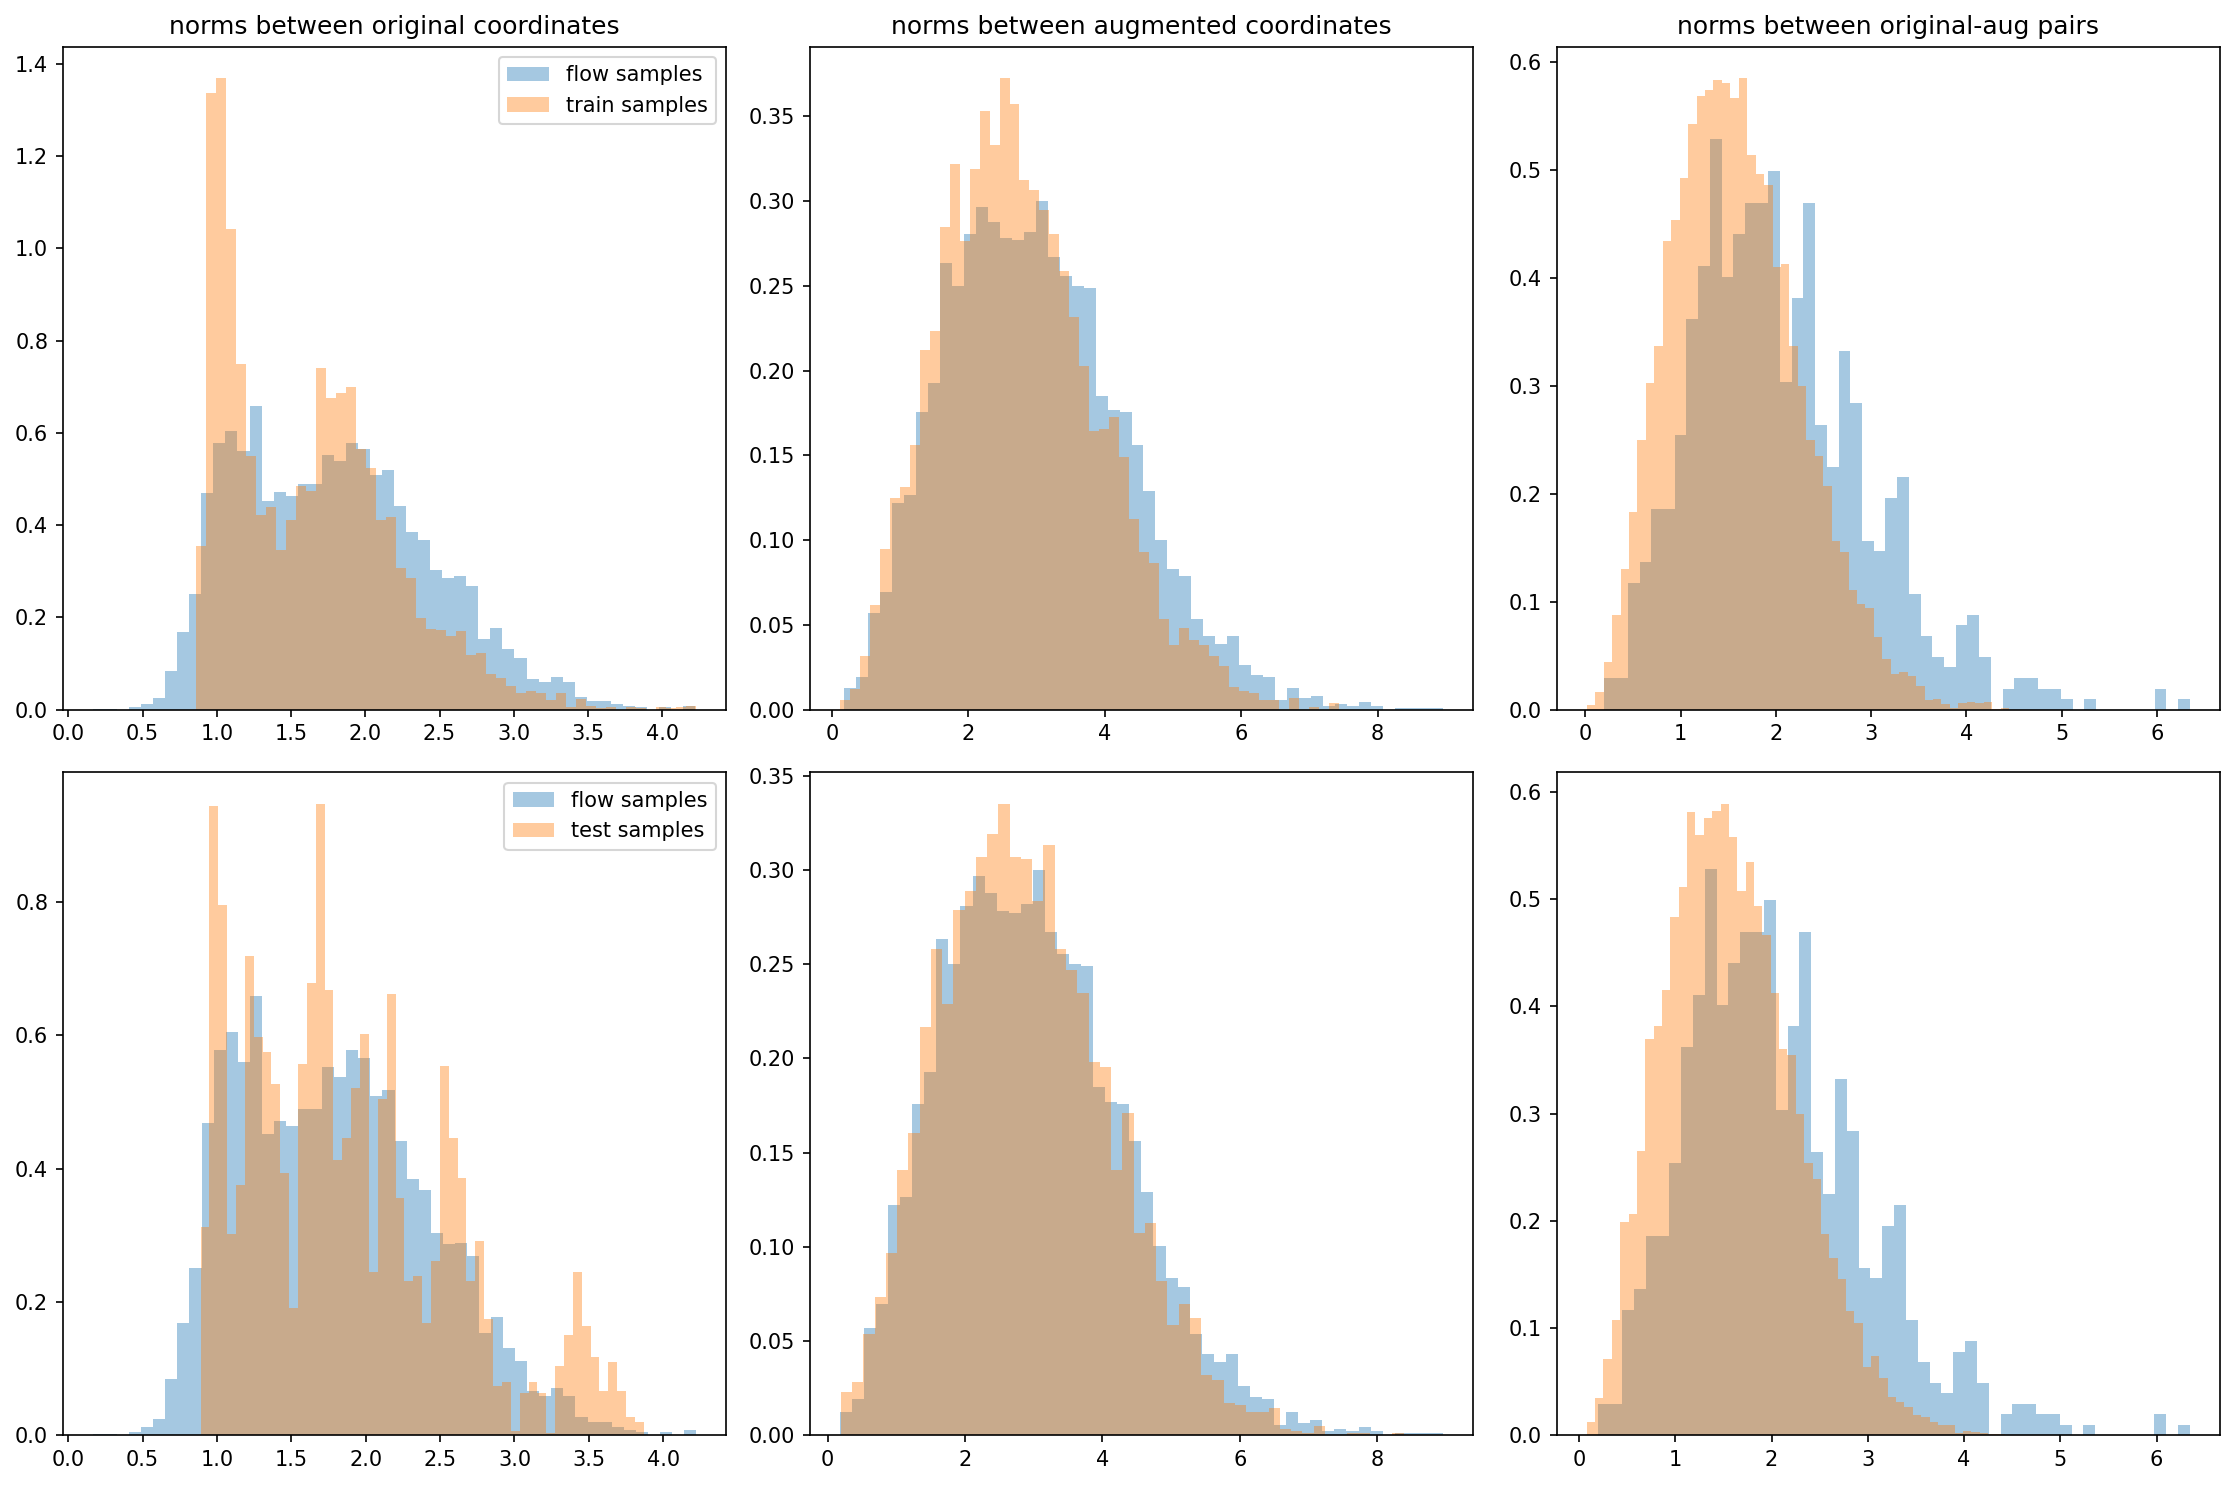

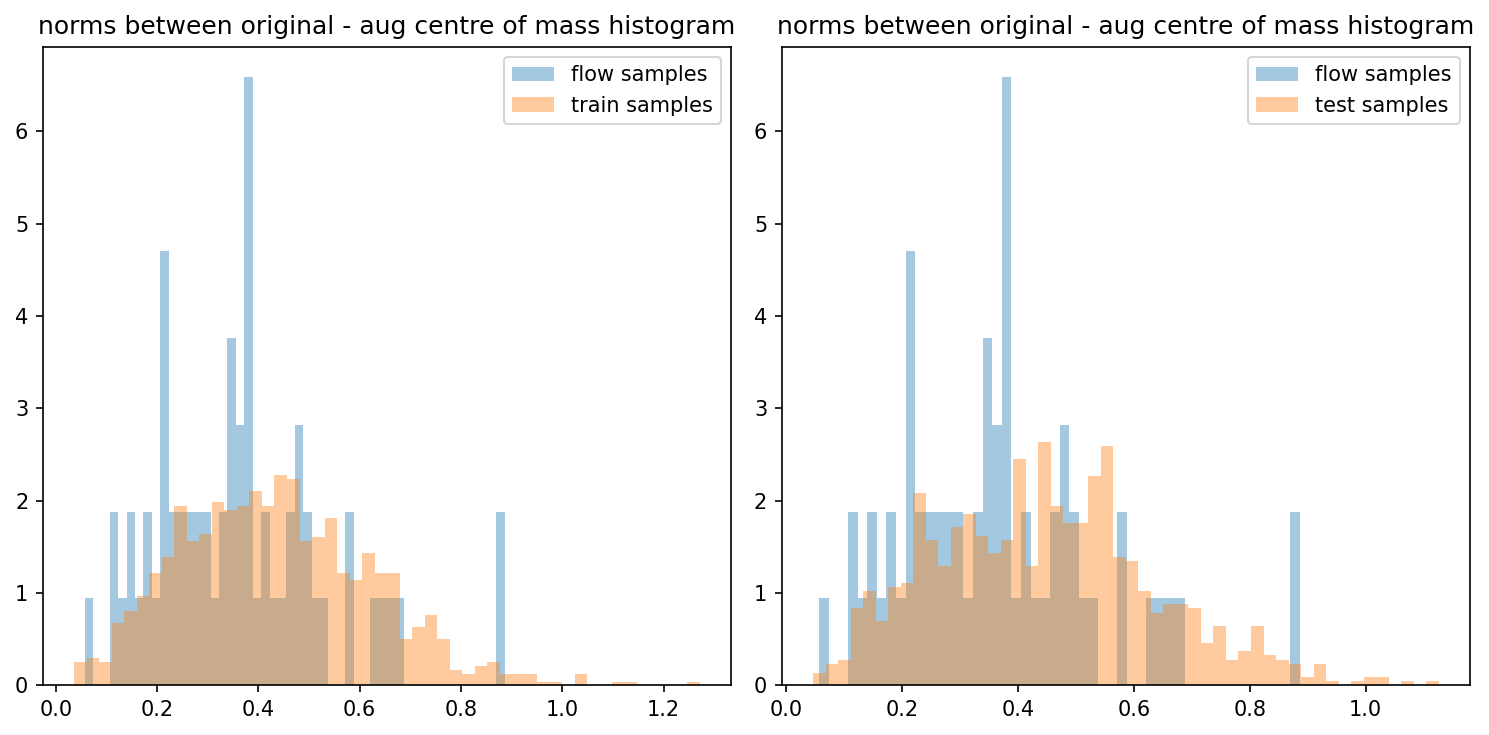

100%|█████████████████████████████████████████| 200/200 [05:43<00:00,  1.72s/it]


{'eval_log_lik': Array(-92.65641, dtype=float32), 'eval_marginal_log_lik': Array(-31.067684, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00220795, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00026116, dtype=float32), 'mean_aug_orig_norm': Array(0.37632412, dtype=float32), 'mean_diff_x_space_after_group_action': Array(1.5477163, dtype=float32)}


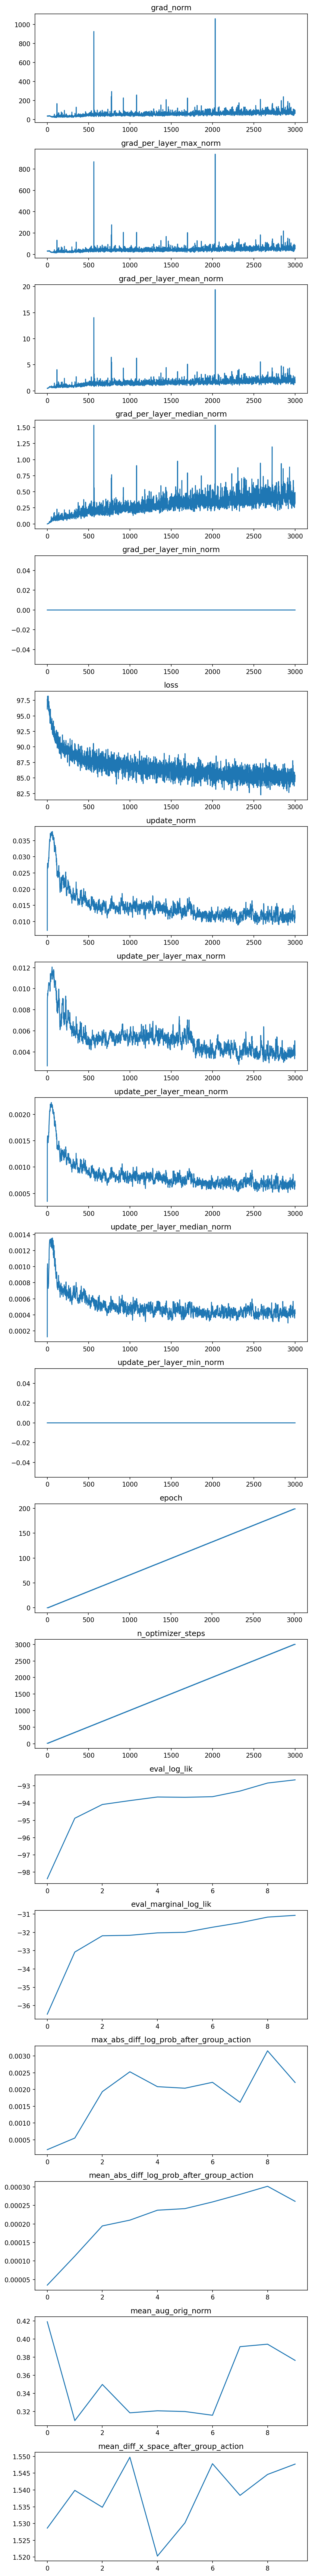

In [8]:
experiment_config = create_train_config(cfg, dim=dim, n_nodes=n_nodes,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

In [9]:
train_data_original, test_data_original = load_dataset(cfg.training.batch_size, 
                                           1000, 
                                           1000)

In [10]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
train_data = original_dataset_to_joint_dataset(train_data_original, subkey,
                                               global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)
key, subkey = jax.random.split(key)
test_data = original_dataset_to_joint_dataset(test_data_original, subkey,
                                              global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)

[<Figure size 2250x1500 with 6 Axes>, <Figure size 1500x750 with 2 Axes>]

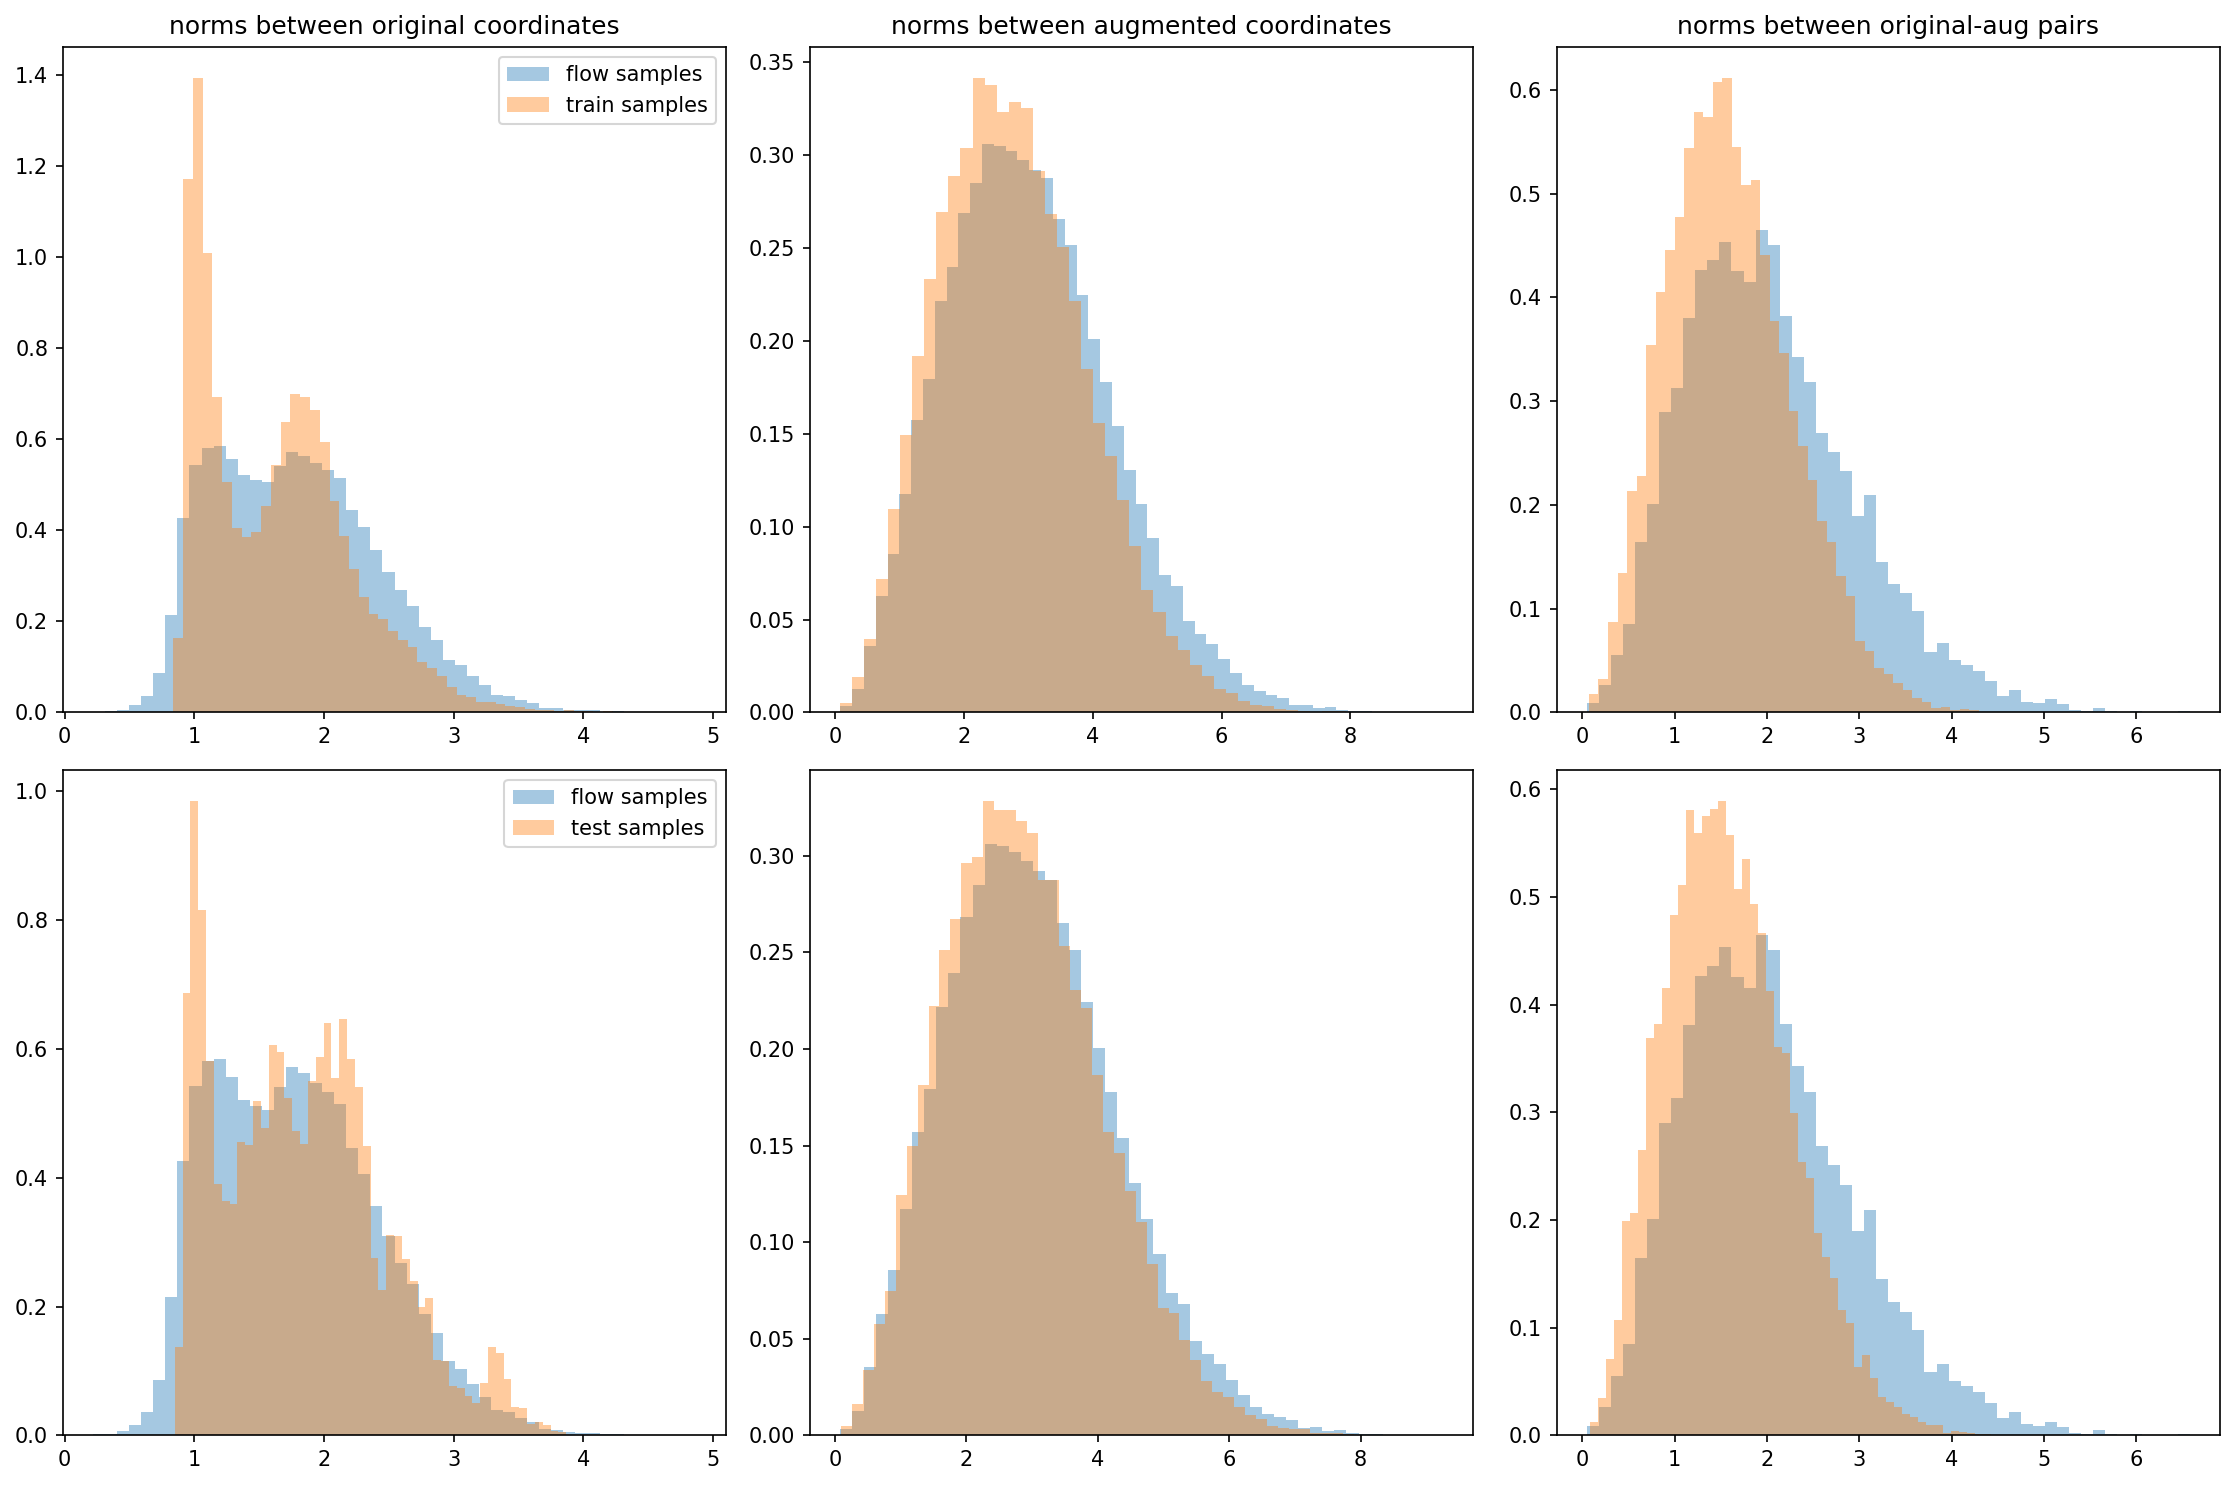

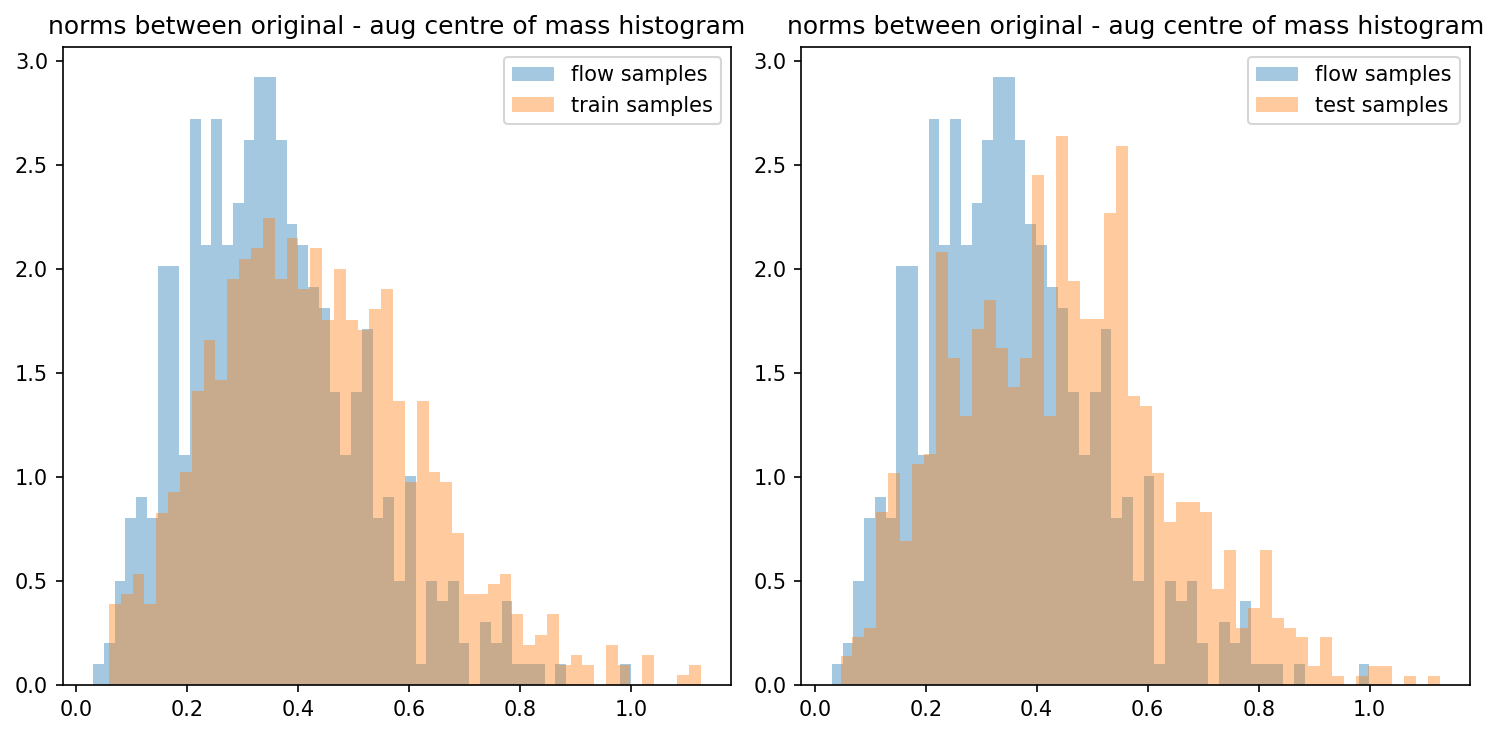

In [11]:
plot_batch_size = 512
sample_fn = sample_fn = lambda params, key, shape: sample_and_log_prob_fn.apply(params, key, shape)[0]
default_plotter(params, sample_fn, key, plot_batch_size, train_data, test_data)

In [12]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=lj13.log_prob_fn,
                                key=jax.random.PRNGKey(1), 
        batch_size=cfg.training.batch_size,
        global_centering=cfg.target.aug_global_centering,
        aug_scale=cfg.target.aug_scale,
                                K=50)

{'ess': Array(0.02826369, dtype=float32),
 'eval_kl': Array(-67.01395, dtype=float32),
 'eval_log_lik': Array(-92.65642, dtype=float32),
 'eval_marginal_log_lik': Array(-29.609118, dtype=float32),
 'max_abs_diff_log_prob_after_group_action': Array(0.00221761, dtype=float32),
 'mean_abs_diff_log_prob_after_group_action': Array(0.00027358, dtype=float32),
 'mean_aug_orig_norm': Array(0.33975655, dtype=float32),
 'mean_diff_x_space_after_group_action': Array(1.5244074, dtype=float32)}

# 